

---

# EDA


---



# 1. Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import warnings
import logging
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import ttest_ind, mannwhitneyu
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [3]:
train_src = '/content/drive/MyDrive/Colab Notebooks/패턴인식/data/train.csv'
train_df = pd.read_csv(train_src)
test_src = '/content/drive/MyDrive/Colab Notebooks/패턴인식/data/test.csv'
test_df = pd.read_csv(test_src)

# Preserve Original
train_ = train_df.copy()
test_ = test_df.copy()

X = train_df.drop(['id','shares','y'], axis=1)
y = train_df['y']
test = test_df.drop(['id'], axis=1)

# 2. Basic Data Exploration and Preprocessing Considerations

## (1) Understanding Data Structure

### ① Basic Data Information


In [4]:
print("Top 5 rows of data:")
X.head()

Top 5 rows of data:


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0             9.0             409.0         0.501326               1.0   
1            10.0             317.0         0.725086               1.0   
2            11.0             447.0         0.584091               1.0   
3            13.0             143.0         0.638298               NaN   
4            17.0             576.0         0.524412               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.587361       23.0             2.0      11.0         0.0   
1                  0.830097        6.0             3.0       NaN        21.0   
2                  0.730104        NaN             1.0       1.0         1.0   
3                  0.787500        3.0             2.0       NaN         0.0   
4                  0.714286        8.0             3.0       NaN         0.0   

   average_token_length  ...  max_positive_polarity  avg_negative_polarity  \
0              4.596577  ...                   1.00              -0.129167   
1              4.624606  ...                   1.00              -0.303815   
2              4.961969  ...                   1.00              -0.202652   
3              4.524476  ...                   0.60               0.000000   
4              5.020833  ...                   0.75              -0.339141   

   min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                -0.1875                   -0.1                0.50   
1                -0.6000                    NaN                0.00   
2                -0.5000                   -0.1                0.75   
3                 0.0000                    0.0                1.00   
4                -1.0000                   -0.1                0.00   

   title_sentiment_polarity  abs_title_subjectivity  \
0                     0.500                    0.00   
1                     0.000                    0.50   
2                     0.125                    0.25   
3                       NaN                    0.50   
4                     0.000                    0.50   

   abs_title_sentiment_polarity  data_channel    weekday  
0                         0.500     Lifestyle        NaN  
1                         0.000     Lifestyle    Tuesday  
2                         0.125         World     Friday  
3                         0.500  Social Media        NaN  
4                         0.000         World  Wednesday  

[5 rows x 46 columns]

In [5]:
print(f"{'X shape:':<13} {X.shape}")
print(f"{'y shape:':<13} {y.shape}")
print(f"{'test shape:':<13} {test.shape}")

X shape:      (22200, 46)
y shape:      (22200,)
test shape:   (9515, 46)


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22200 entries, 0 to 22199
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                20000 non-null  float64
 1   n_tokens_content              20054 non-null  float64
 2   n_unique_tokens               19942 non-null  float64
 3   n_non_stop_words              20017 non-null  float64
 4   n_non_stop_unique_tokens      19944 non-null  float64
 5   num_hrefs                     19967 non-null  float64
 6   num_self_hrefs                19920 non-null  float64
 7   num_imgs                      19986 non-null  float64
 8   num_videos                    19906 non-null  float64
 9   average_token_length          19987 non-null  float64
 10  num_keywords                  19955 non-null  float64
 11  kw_min_min                    19984 non-null  float64
 12  kw_max_min                    20021 non-null  float64
 13  k

In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 22200 entries, 0 to 22199
Series name: y
Non-Null Count  Dtype
--------------  -----
22200 non-null  int64
dtypes: int64(1)
memory usage: 173.6 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   n_tokens_title                8562 non-null   float64
 1   n_tokens_content              8540 non-null   float64
 2   n_unique_tokens               8574 non-null   float64
 3   n_non_stop_words              8554 non-null   float64
 4   n_non_stop_unique_tokens      8600 non-null   float64
 5   num_hrefs                     8571 non-null   float64
 6   num_self_hrefs                8570 non-null   float64
 7   num_imgs                      8587 non-null   float64
 8   num_videos                    8485 non-null   float64
 9   average_token_length          8540 non-null   float64
 10  num_keywords                  8583 non-null   float64
 11  kw_min_min                    8591 non-null   float64
 12  kw_max_min                    8580 non-null   float64
 13  kw_

### ② Number of duplicate rows

In [9]:
print(f"\nNumber of duplicate rows of X : {X.duplicated().sum()}")
print(f"\nNumber of duplicate rows of test: {test.duplicated().sum()}")


Number of duplicate rows of X : 0

Number of duplicate rows of test: 0


### ③ Number of unique values per column

In [10]:
print("\nNumber of unique values per column:")
X.nunique()


Number of unique values per column:


n_tokens_title                     17
n_tokens_content                 2023
n_unique_tokens                 15806
n_non_stop_words                 1301
n_non_stop_unique_tokens        13993
num_hrefs                         114
num_self_hrefs                     52
num_imgs                           79
num_videos                         47
average_token_length            16678
num_keywords                       10
kw_min_min                         16
kw_max_min                       1005
kw_avg_min                      11194
kw_min_max                        842
kw_max_max                         24
kw_avg_max                      17230
kw_min_avg                       9044
kw_max_avg                      11957
kw_avg_avg                      19917
self_reference_min_shares        1106
self_reference_max_shares         975
self_reference_avg_sharess       5210
LDA_00                          19870
LDA_01                          19775
LDA_02                          20010
LDA_03                          19685
LDA_04                          19925
global_subjectivity             18022
global_sentiment_polarity       18044
global_rate_positive_words       8680
global_rate_negative_words       6874
rate_positive_words              1683
rate_negative_words              1684
avg_positive_polarity           14979
min_positive_polarity              31
max_positive_polarity              36
avg_negative_polarity            8269
min_negative_polarity              49
max_negative_polarity              46
title_subjectivity                470
title_sentiment_polarity          572
abs_title_subjectivity            376
abs_title_sentiment_polarity      456
data_channel                        6
weekday                             7
dtype: int64

## (2) Basic Statistics

In [11]:
X.describe()

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    20000.000000      20054.000000     19942.000000      20017.000000   
mean        10.387150        543.920614         0.530611          0.970175   
std          2.105585        460.694982         0.138709          0.170108   
min          3.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.471005          1.000000   
50%         10.000000        409.000000         0.539683          1.000000   
75%         12.000000        715.750000         0.609865          1.000000   
max         19.000000       7413.000000         1.000000          1.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              19944.000000  19967.000000    19920.000000  19986.000000   
mean                   0.672893     10.840337        3.303263      4.473431   
std                    0.155004     11.024976        3.944523      8.092647   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.626836      4.000000        1.000000      1.000000   
50%                    0.691228      7.000000        3.000000      1.000000   
75%                    0.754545     14.000000        4.000000      4.000000   
max                    1.000000    186.000000      116.000000    108.000000   

         num_videos  average_token_length  ...  avg_positive_polarity  \
count  19906.000000          19987.000000  ...           20050.000000   
mean       1.248669              4.552209  ...               0.353982   
std        4.087507              0.840299  ...               0.104591   
min        0.000000              0.000000  ...               0.000000   
25%        0.000000              4.479499  ...               0.306164   
50%        0.000000              4.665148  ...               0.359375   
75%        1.000000              4.857716  ...               0.411461   
max       91.000000              8.041534  ...               1.000000   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
count           19958.000000           20033.000000           19916.000000   
mean                0.095152               0.755952              -0.259972   
std                 0.071507               0.248262               0.127974   
min                 0.000000               0.000000              -1.000000   
25%                 0.050000               0.600000              -0.329167   
50%                 0.100000               0.800000              -0.253718   
75%                 0.100000               1.000000              -0.187500   
max                 1.000000               1.000000               0.000000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
count           19926.000000           19997.000000        19928.000000   
mean               -0.523223              -0.107647            0.284772   
std                 0.289365               0.096059            0.327151   
min                -1.000000              -1.000000            0.000000   
25%                -0.700000              -0.125000            0.000000   
50%                -0.500000              -0.100000            0.144444   
75%                -0.300000              -0.050000            0.500000   
max                 0.000000               0.000000            1.000000   

       title_sentiment_polarity  abs_title_subjectivity  \
count              19967.000000            19934.000000   
mean                   0.070169                0.342966   
std                    0.264686                0.188498   
min                   -1.000000                0.000000   
25%                    0.000000                0.166667   
50%                    0.000000                0.500000   
75%                    0.138600                0.500000   
max                    1.000000                0.500000   

       abs_title_sentim

In [12]:
X.select_dtypes(include=['object', 'category']).describe()

data_channel    weekday
count         20053      20087
unique            6          7
top           World  Wednesday
freq           4245       3798

## (3) Missing Value Check

In [13]:
total_X = len(X)
total_test = len(test)
X_nulls = X.isnull().sum()
test_nulls = test.isnull().sum()
X_null_rate = (X_nulls / total_X * 100).round(2).astype(str) + "%"
test_null_rate = (test_nulls / total_test * 100).round(2).astype(str) + "%"

null_summary = pd.DataFrame({
    "X_nulls": X_nulls,
    "X_null_rate": X_null_rate,
    "test_nulls": test_nulls,
    "test_null_rate": test_null_rate
})

null_summary

X_nulls X_null_rate  test_nulls test_null_rate
n_tokens_title                   2200       9.91%         953         10.02%
n_tokens_content                 2146       9.67%         975         10.25%
n_unique_tokens                  2258      10.17%         941          9.89%
n_non_stop_words                 2183       9.83%         961          10.1%
n_non_stop_unique_tokens         2256      10.16%         915          9.62%
num_hrefs                        2233      10.06%         944          9.92%
num_self_hrefs                   2280      10.27%         945          9.93%
num_imgs                         2214       9.97%         928          9.75%
num_videos                       2294      10.33%        1030         10.83%
average_token_length             2213       9.97%         975         10.25%
num_keywords                     2245      10.11%         932           9.8%
kw_min_min                       2216       9.98%         924          9.71%
kw_max_min                       2179       9.82%         935          9.83%
kw_avg_min                       2229      10.04%         930          9.77%
kw_min_max                       2215       9.98%         932           9.8%
kw_max_max                       2232      10.05%         920          9.67%
kw_avg_max                       2160       9.73%         953         10.02%
kw_min_avg                       2151       9.69%         966         10.15%
kw_max_avg                       2182       9.83%         940          9.88%
kw_avg_avg                       2177       9.81%         975         10.25%
self_reference_min_shares        2206       9.94%         948          9.96%
self_reference_max_shares        2174       9.79%        1001         10.52%
self_reference_avg_sharess       2246      10.12%         955         10.04%
LDA_00                           2224      10.02%         942           9.9%
LDA_01                           2202       9.92%         958         10.07%
LDA_02                           2153        9.7%        1001         10.52%
LDA_03                           2243       10.1%         993         10.44%
LDA_04                           2187       9.85%         965         10.14%
global_subjectivity              2254      10.15%         922          9.69%
global_sentiment_polarity        2231      10.05%         970         10.19%
global_rate_positive_words       2234      10.06%         895          9.41%
global_rate_negative_words       2249      10.13%         930          9.77%
rate_positive_words              2219       10.0%         927          9.74%
rate_negative_words              2242       10.1%         973         10.23%
avg_positive_polarity            2150       9.68%         972         10.22%
min_positive_polarity            2242       10.1%         977         10.27%
max_positive_polarity            2167       9.76%         922          9.69%
avg_negative_polarity            2284      10.29%         935          9.83%
min_negative_polarity            2274      10.24%         901          9.47%
max_negative_polarity            2203       9.92%        1016         10.68%
title_subjectivity               2272      10.23%         967         10.16%
title_sentiment_polarity         2233      10.06%         923           9.7%
abs_title_subjectivity           2266      10.21%         966         10.15%
abs_title_sentiment_polarity     2249      10.13%         996         10.47%
data_channel                     2147       9.67%         962         10.11%
weekday                          2113       9.52%         959         10.08%

## (4) Outlier Detection

In [14]:
summary = X.describe().T

# IQR Method
Q1 = summary["25%"]
Q3 = summary["75%"]
IQR = Q3 - Q1
threshold_upper = Q3 + 1.5 * IQR
threshold_lower = Q1 - 1.5 * IQR

# Std Dev Criterion: std greater than mean (too dispersed)
high_std = summary["std"] > summary["mean"]

# Mean vs. Median Criterion: difference greater than std (severe skewness)
skewed = abs(summary["mean"] - summary["50%"]) > summary["std"]

# Combine outlier conditions
potential_outliers = summary[
    (summary["max"] > threshold_upper) |
    (summary["min"] < threshold_lower) |
    high_std |
    skewed
]

print("IQR outlier criterion:", ((summary["max"] > threshold_upper) | (summary["min"] < threshold_lower)).sum(), "개")
print("Std > mean criterion:", high_std.sum(), "개")
print("Mean-median difference criterion:", skewed.sum(), "개")

potential_outliers.T

IQR outlier criterion: 38 개
Std > mean criterion: 24 개
Mean-median difference criterion: 0 개


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
count    20000.000000      20054.000000     19942.000000      20017.000000   
mean        10.387150        543.920614         0.530611          0.970175   
std          2.105585        460.694982         0.138709          0.170108   
min          3.000000          0.000000         0.000000          0.000000   
25%          9.000000        246.000000         0.471005          1.000000   
50%         10.000000        409.000000         0.539683          1.000000   
75%         12.000000        715.750000         0.609865          1.000000   
max         19.000000       7413.000000         1.000000          1.000000   

       n_non_stop_unique_tokens     num_hrefs  num_self_hrefs      num_imgs  \
count              19944.000000  19967.000000    19920.000000  19986.000000   
mean                   0.672893     10.840337        3.303263      4.473431   
std                    0.155004     11.024976        3.944523      8.092647   
min                    0.000000      0.000000        0.000000      0.000000   
25%                    0.626836      4.000000        1.000000      1.000000   
50%                    0.691228      7.000000        3.000000      1.000000   
75%                    0.754545     14.000000        4.000000      4.000000   
max                    1.000000    186.000000      116.000000    108.000000   

         num_videos  average_token_length  ...  rate_positive_words  \
count  19906.000000          19987.000000  ...         19981.000000   
mean       1.248669              4.552209  ...             0.682568   
std        4.087507              0.840299  ...             0.189609   
min        0.000000              0.000000  ...             0.000000   
25%        0.000000              4.479499  ...             0.600000   
50%        0.000000              4.665148  ...             0.709677   
75%        1.000000              4.857716  ...             0.800000   
max       91.000000              8.041534  ...             1.000000   

       rate_negative_words  avg_positive_polarity  min_positive_polarity  \
count         19958.000000           20050.000000           19958.000000   
mean              0.287436               0.353982               0.095152   
std               0.155158               0.104591               0.071507   
min               0.000000               0.000000               0.000000   
25%               0.185185               0.306164               0.050000   
50%               0.280000               0.359375               0.100000   
75%               0.380952               0.411461               0.100000   
max               1.000000               1.000000               1.000000   

       avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
count           19916.000000           19926.000000           19997.000000   
mean               -0.259972              -0.523223              -0.107647   
std                 0.127974               0.289365               0.096059   
min                -1.000000              -1.000000              -1.000000   
25%                -0.329167              -0.700000              -0.125000   
50%                -0.253718              -0.500000              -0.100000   
75%                -0.187500              -0.300000              -0.050000   
max                 0.000000               0.000000               0.000000   

       title_subjectivity  title_sentiment_polarity  \
count        19928.000000              19967.000000   
mean             0.284772                  0.070169   
std              0.327151                  0.264686   
min              0.000000                 -1.000000   
25%              0.000000                  0.000000   
50%              0.144444                  0.000000   
75%              0.500000                  0.138600   
max              1.000000                  1.000000   

       abs_title_sentiment_polarity  
count                  19951.0

# 3. Distribution and Characteristics of Variables

## (1) Univariate Analysis

### ① Numerical Variables

#### --- Histogram & Density Graph

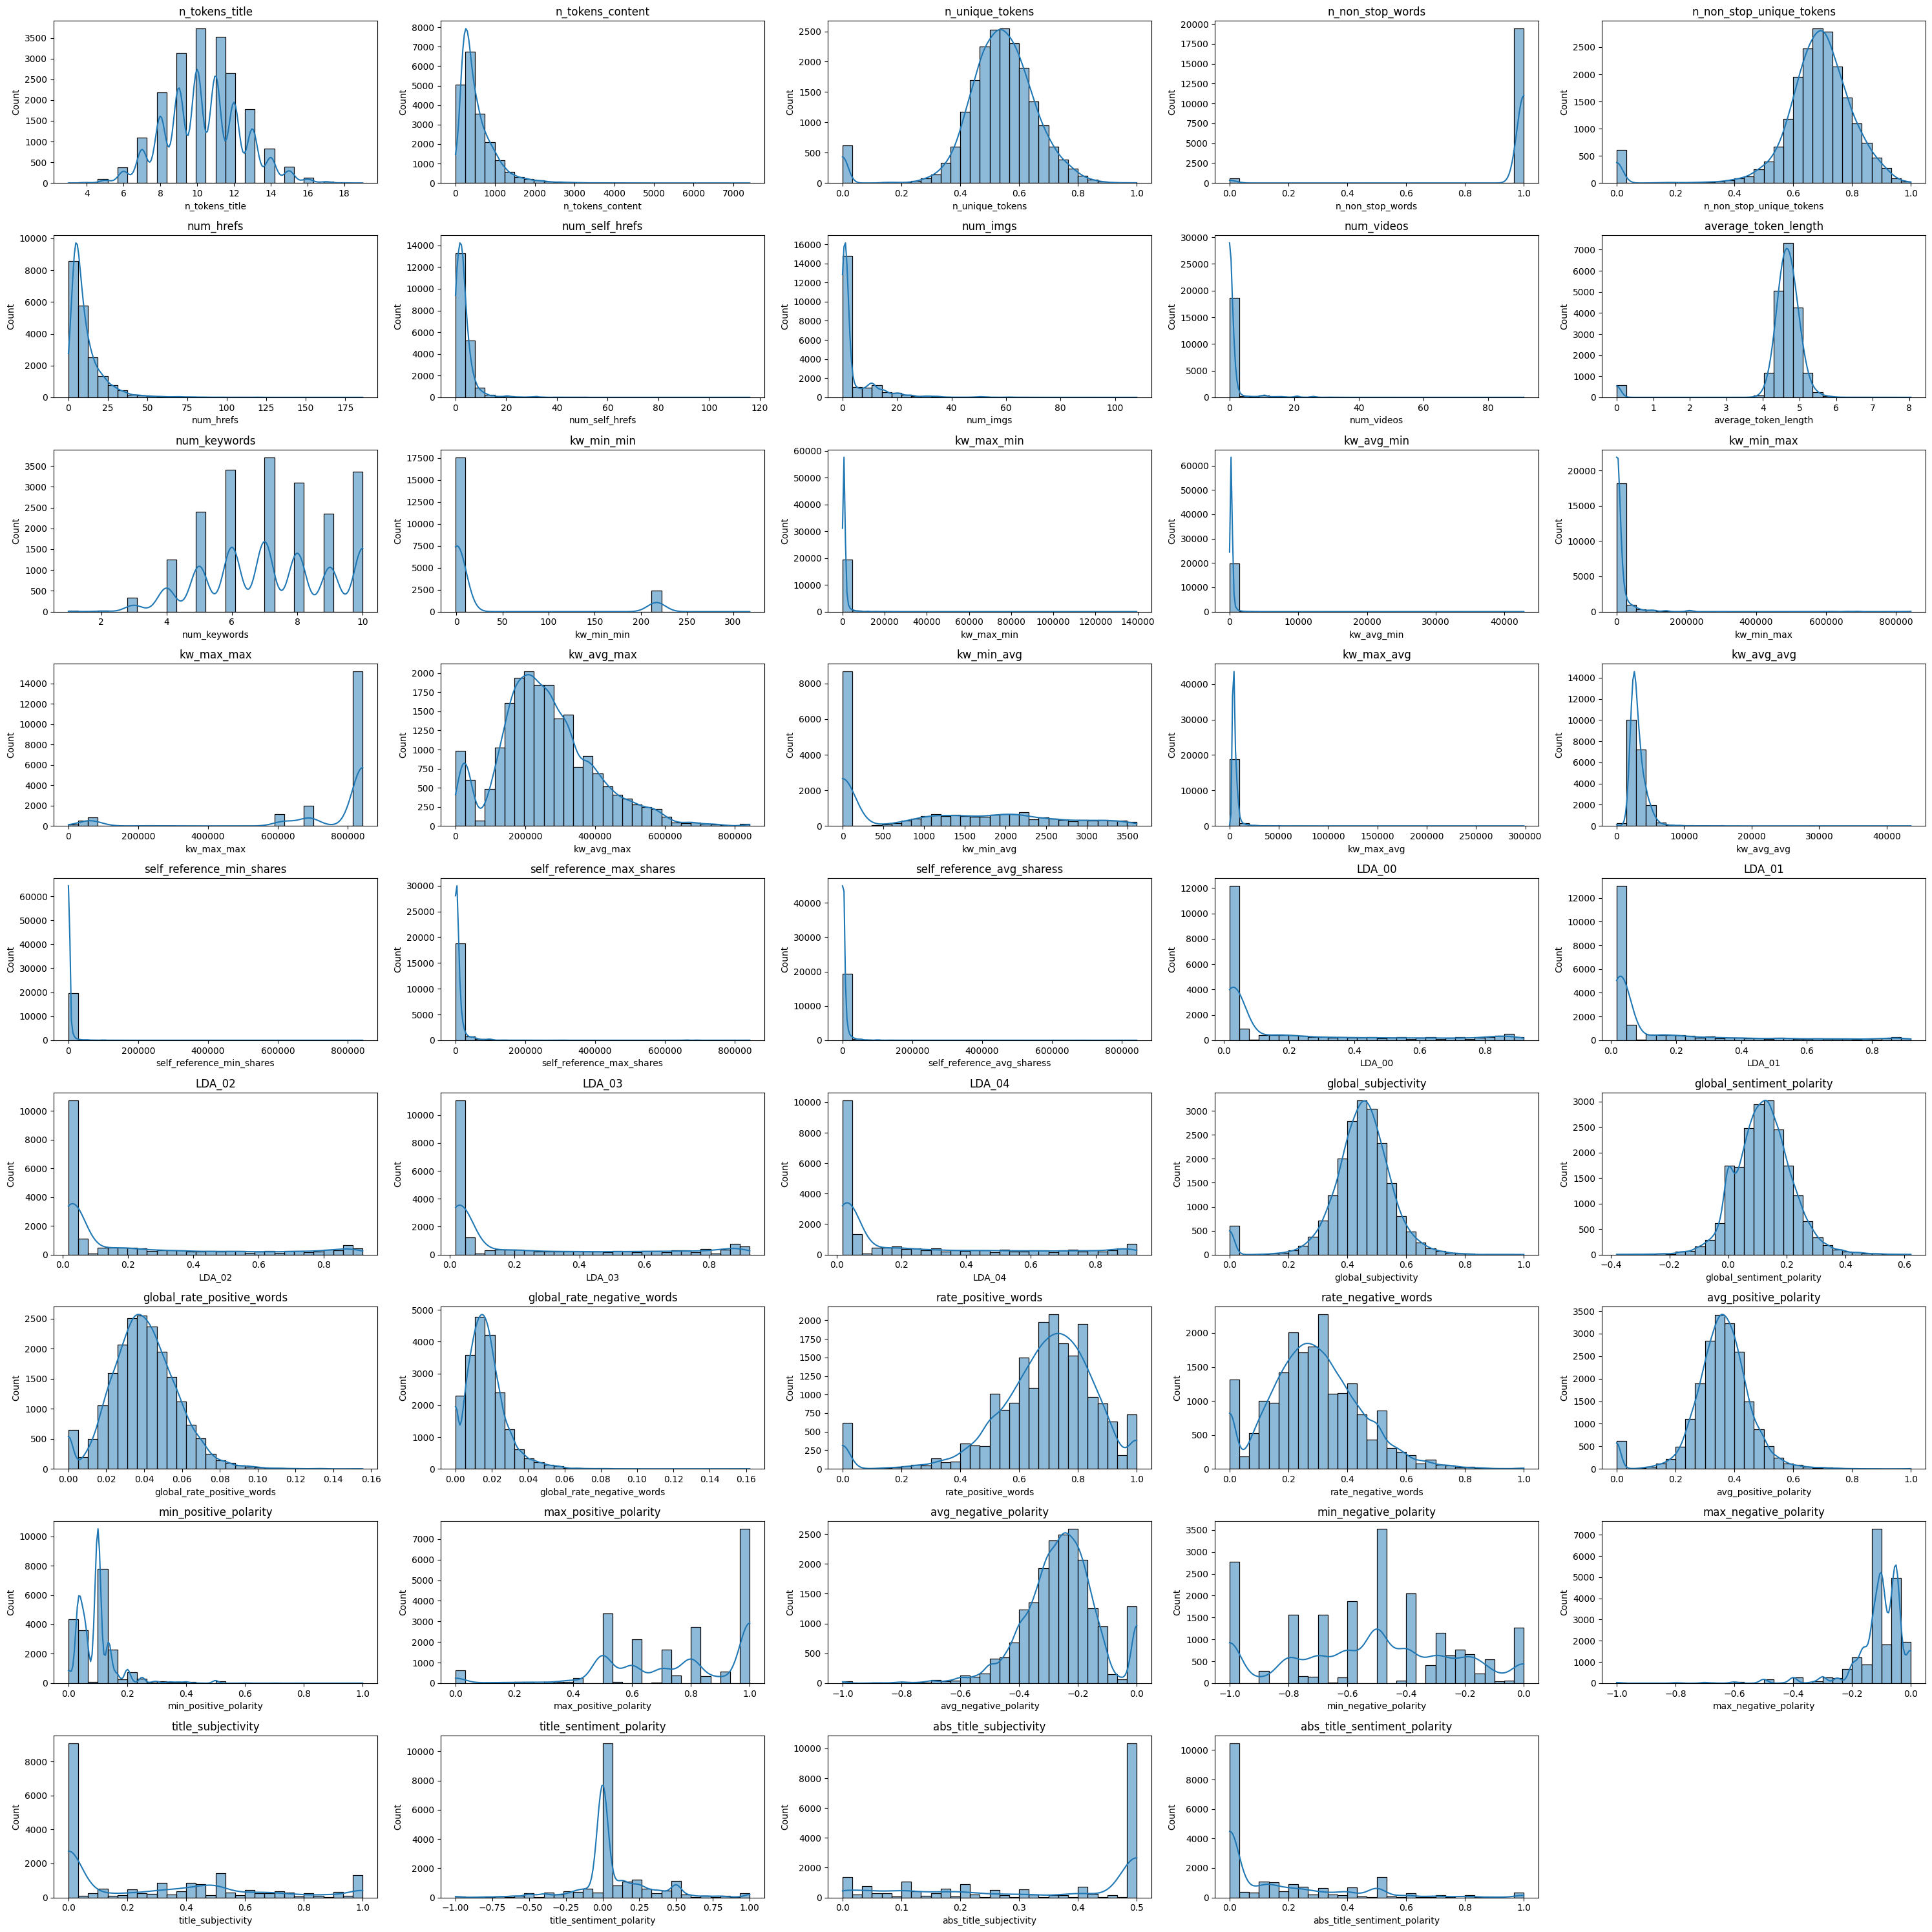

In [15]:
cols_visualize = X.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(cols_visualize):
    sns.histplot(X[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### --- Boxplot

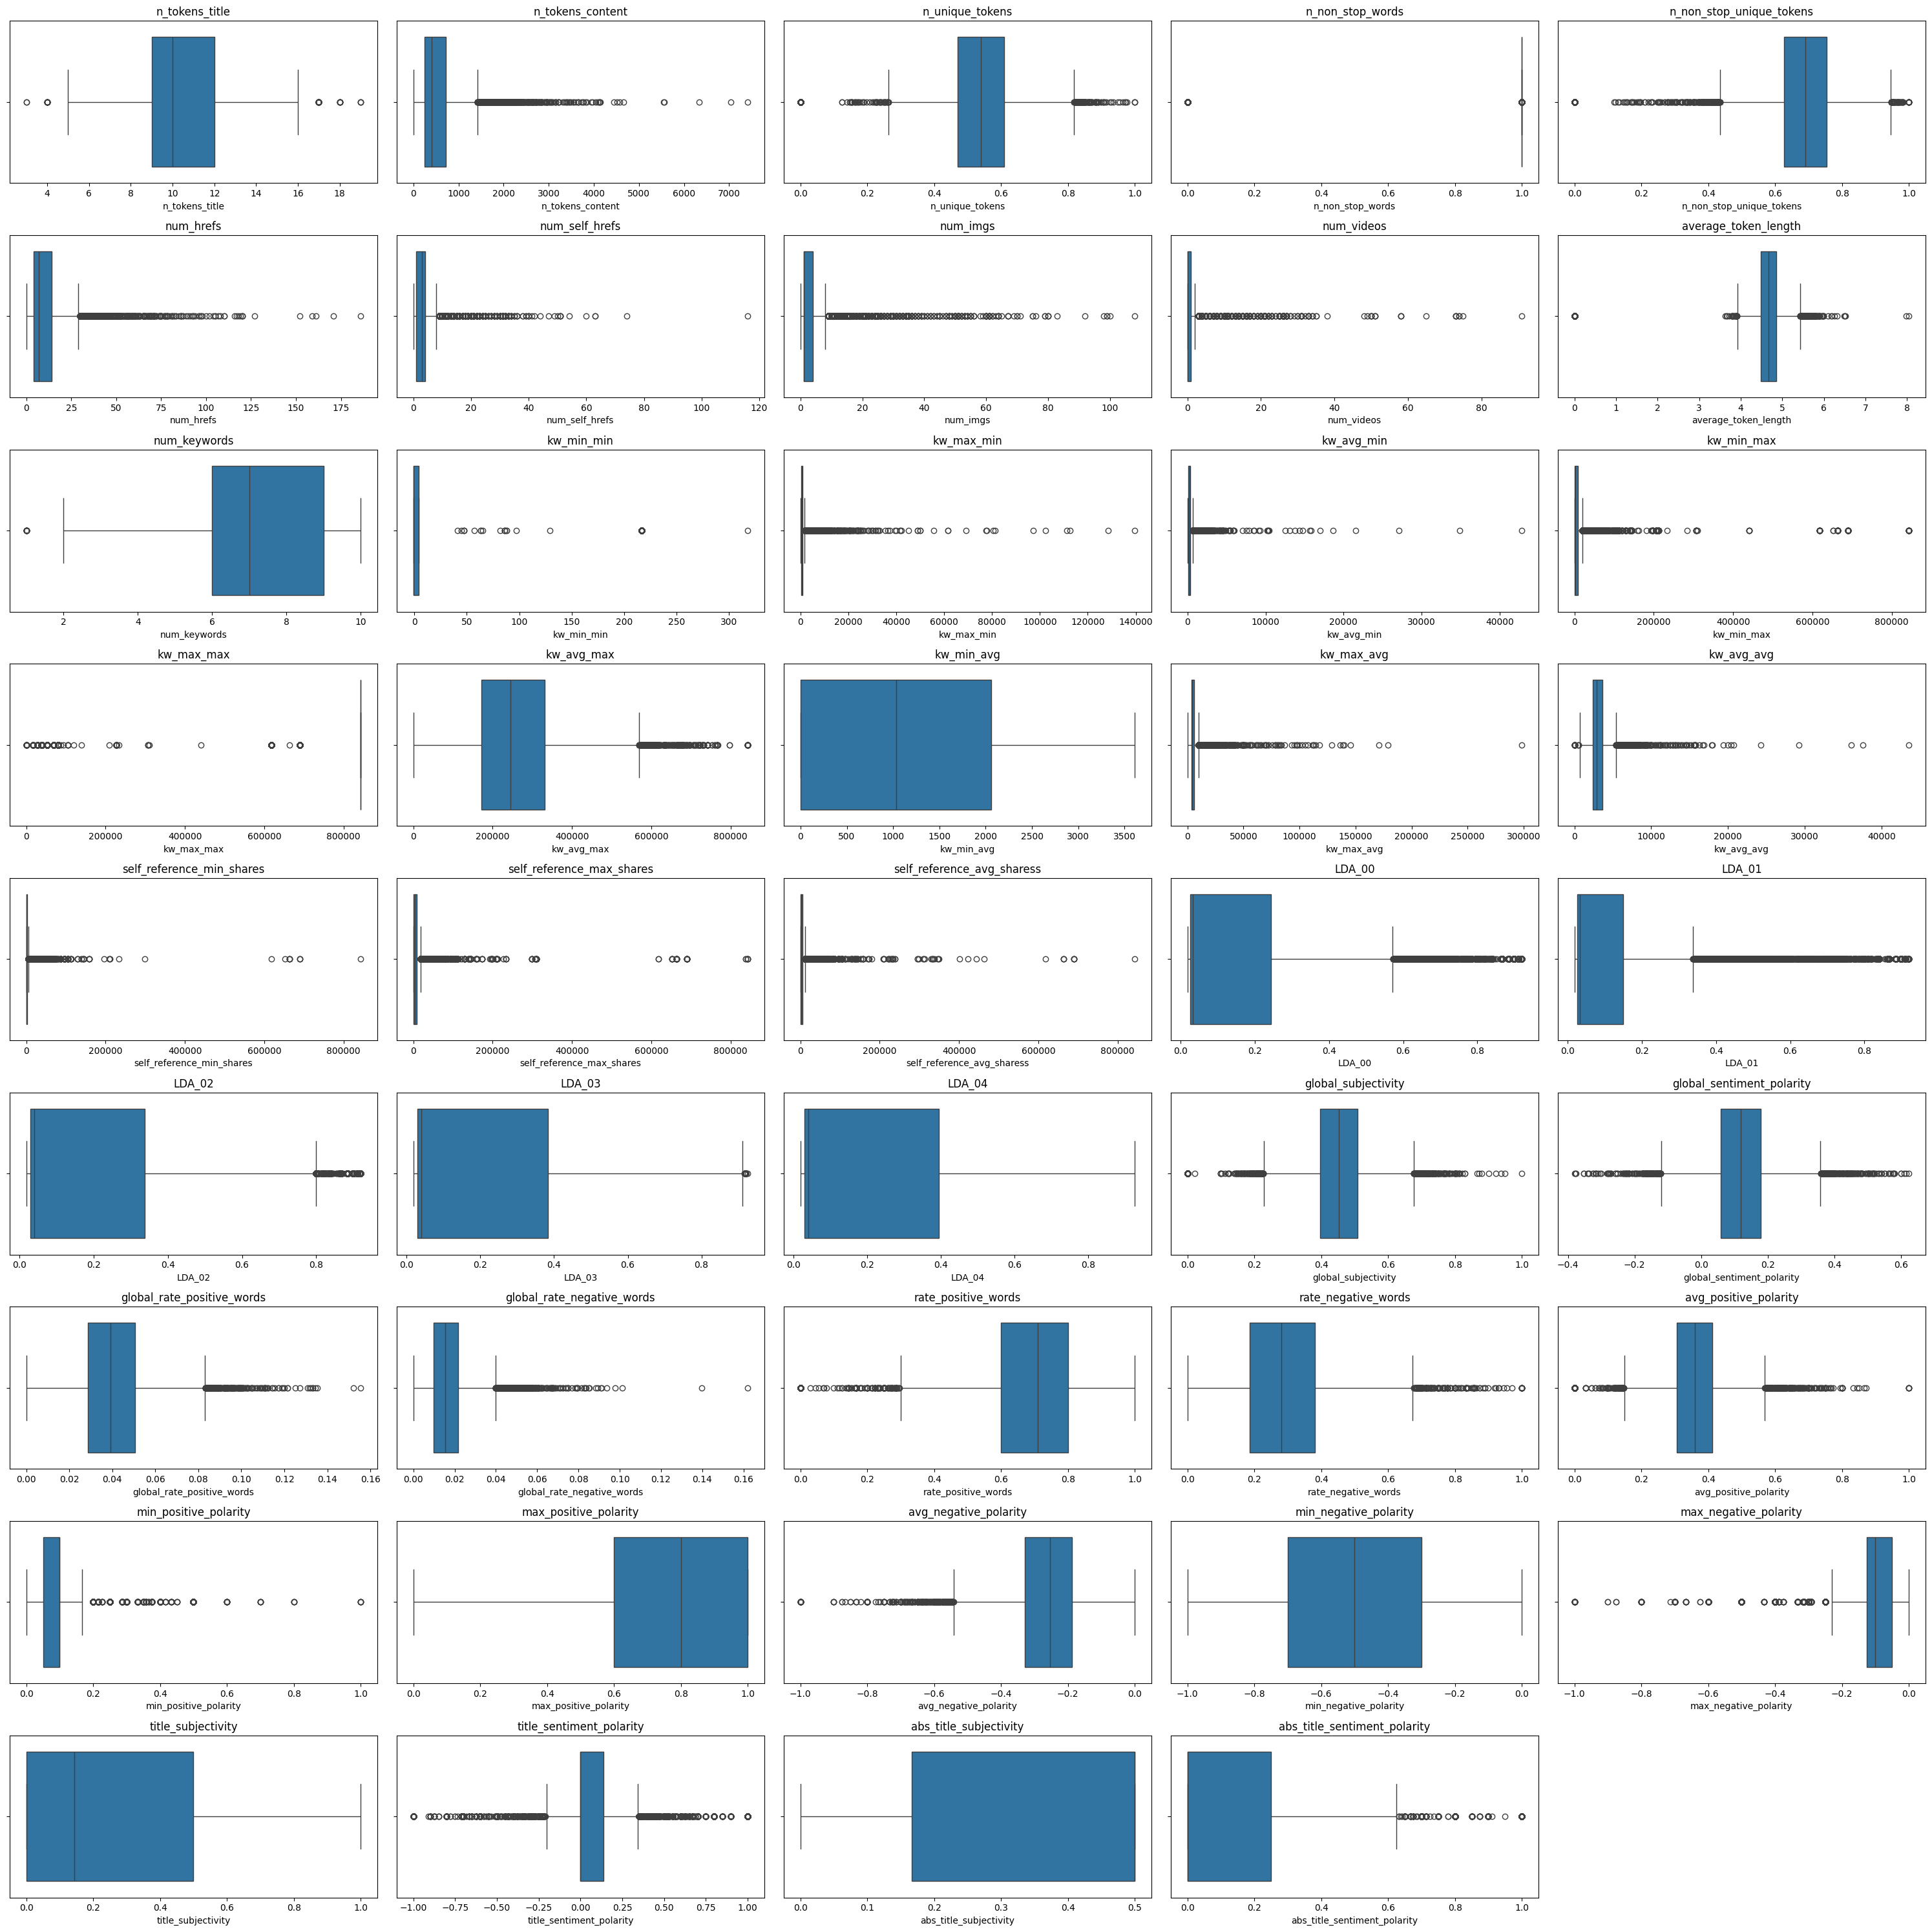

In [16]:
cols_visualize = X.select_dtypes(include=['number'])

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(30, 30))
axes = axes.flatten()

for i, col in enumerate(cols_visualize.columns):
    sns.boxplot(x=X[col], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### ② Categorical Variables

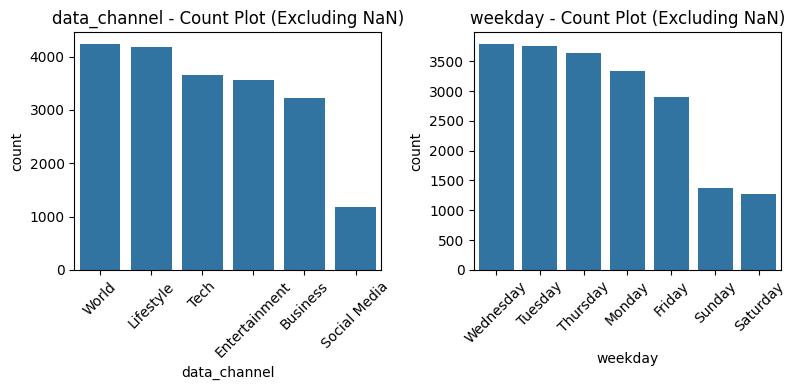

In [17]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    order = X[col].value_counts().index
    sns.countplot(x=X[col], ax=axes[i], order=order)
    axes[i].set_title(f"{col} - Count Plot (Excluding NaN)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

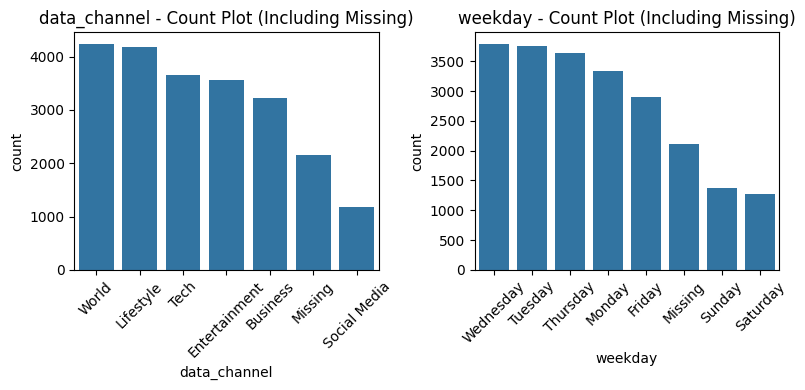

In [18]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    temp_col = X[col].fillna('Missing')
    order = temp_col.value_counts().index
    sns.countplot(x=temp_col, ax=axes[i], order=order)
    axes[i].set_title(f"{col} - Count Plot (Including Missing)")
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### ③ Target Distribution

In [19]:
train_df['y'].value_counts(normalize=True) # (11196, 11004)

y
0    0.504324
1    0.495676
Name: proportion, dtype: float64

## (2) Bivariate Analysis

### ① Numerical vs. Target (y)

#### --- Boxplot

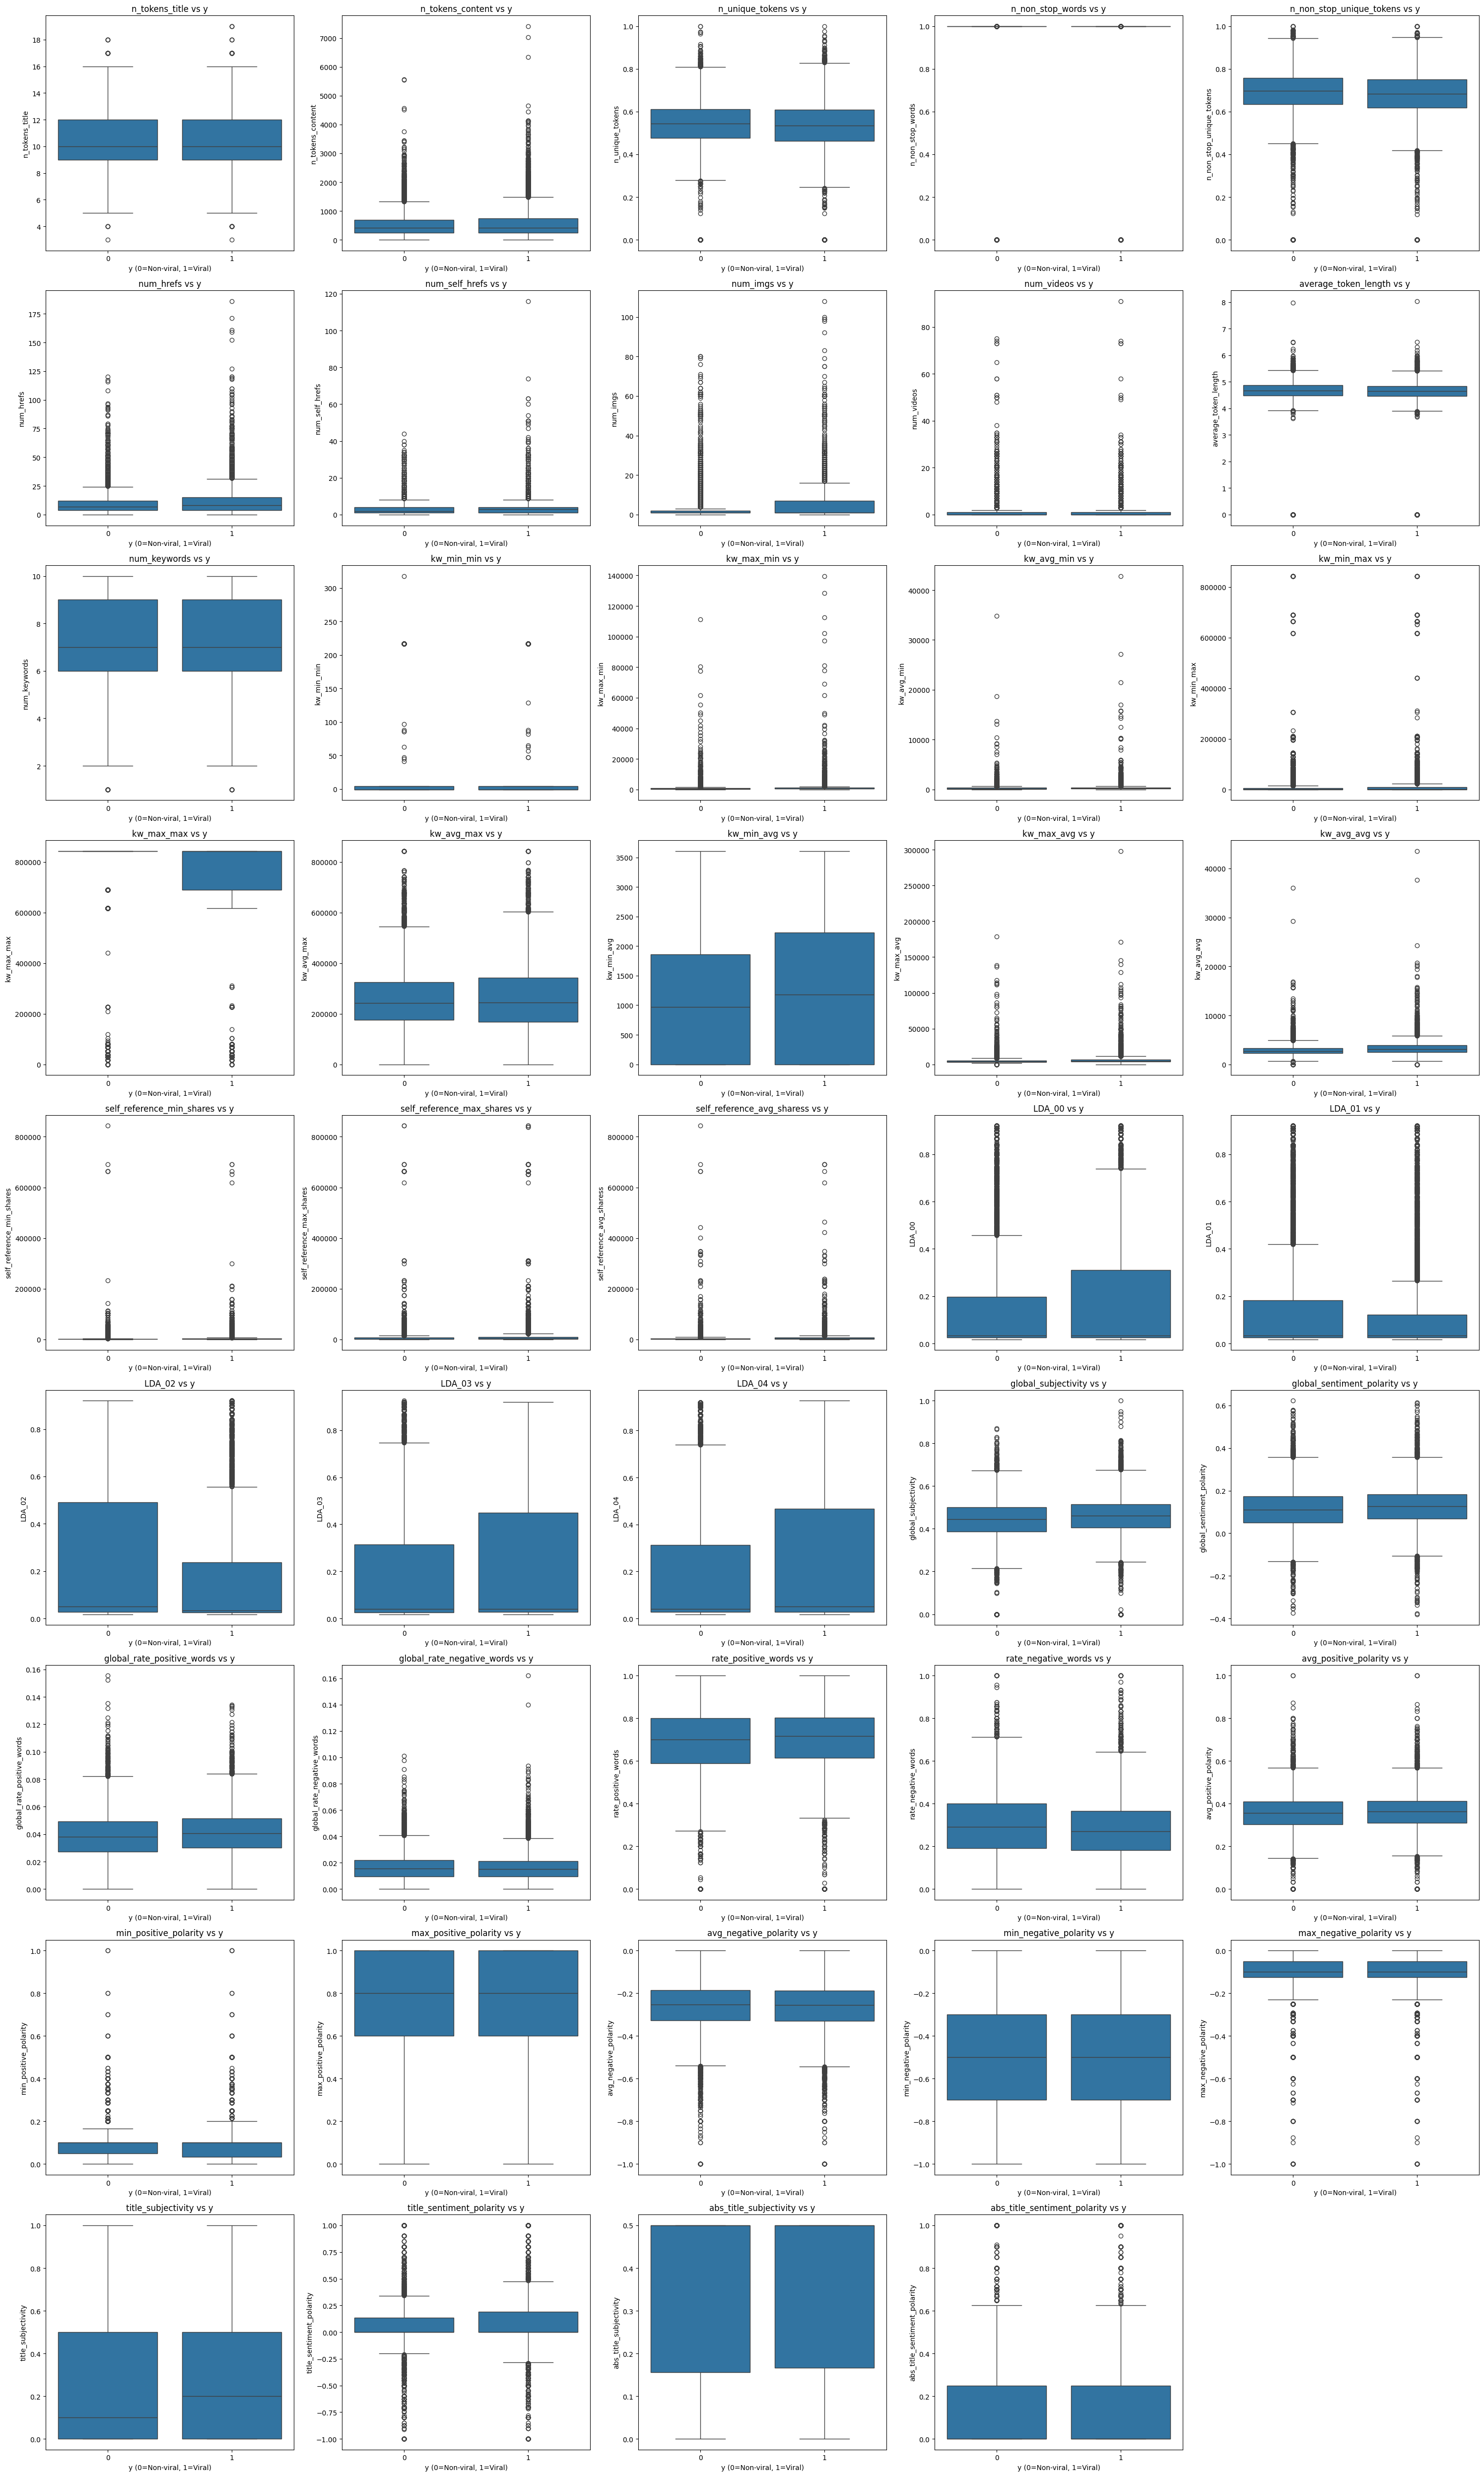

In [20]:
num_cols = X.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(30, 50))
axes = axes.flatten()

for i, var in enumerate(num_cols):
    # Remove missing values
    temp_df = pd.concat([X[var], y], axis=1).dropna(subset=[var])

    # Boxplot
    sns.boxplot(x='y', y=var, data=temp_df, ax=axes[i])
    axes[i].set_title(f'{var} vs y')
    axes[i].set_xlabel('y (0=Non-viral, 1=Viral)')
    axes[i].set_ylabel(var)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

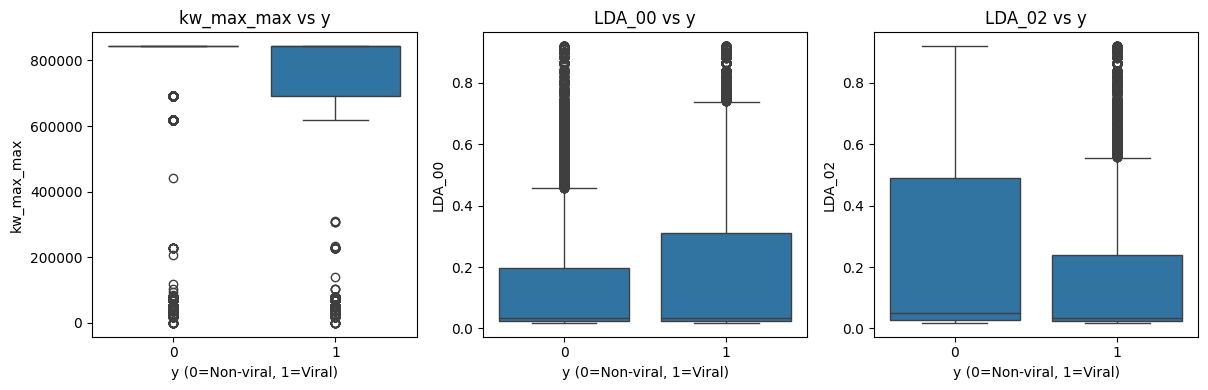

In [21]:
selected_vars = ['kw_max_max', 'LDA_00', 'LDA_02']

# visualize
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes = axes.flatten()

for i, var in enumerate(selected_vars):
    temp_df = pd.concat([X[var], y], axis=1).dropna(subset=[var])

    sns.boxplot(x='y', y=var, data=temp_df, ax=axes[i])
    axes[i].set_title(f'{var} vs y')
    axes[i].set_xlabel('y (0=Non-viral, 1=Viral)')
    axes[i].set_ylabel(var)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### --- Mann-Whitney U test

In [22]:
num_cols = X.select_dtypes(include='number').columns

for col in num_cols:
    group0 = X[y == 0][col].dropna()
    group1 = X[y == 1][col].dropna()

    stat, p = mannwhitneyu(group0, group1, alternative='two-sided')

    if p < 0.05:
        print(f'{col}: Significant difference (p={p:.4f})')
    else:
        print(f'{col}: No significant difference (p={p:.4f})')

n_tokens_title: Significant difference (p=0.0000)
n_tokens_content: No significant difference (p=0.1206)
n_unique_tokens: Significant difference (p=0.0000)
n_non_stop_words: No significant difference (p=0.0891)
n_non_stop_unique_tokens: Significant difference (p=0.0000)
num_hrefs: Significant difference (p=0.0000)
num_self_hrefs: Significant difference (p=0.0004)
num_imgs: Significant difference (p=0.0000)
num_videos: Significant difference (p=0.0001)
average_token_length: Significant difference (p=0.0000)
num_keywords: Significant difference (p=0.0000)
kw_min_min: Significant difference (p=0.0002)
kw_max_min: Significant difference (p=0.0000)
kw_avg_min: Significant difference (p=0.0000)
kw_min_max: Significant difference (p=0.0000)
kw_max_max: Significant difference (p=0.0000)
kw_avg_max: No significant difference (p=0.2717)
kw_min_avg: Significant difference (p=0.0000)
kw_max_avg: Significant difference (p=0.0000)
kw_avg_avg: Significant difference (p=0.0000)
self_reference_min_shar

#### --- Correlation with y

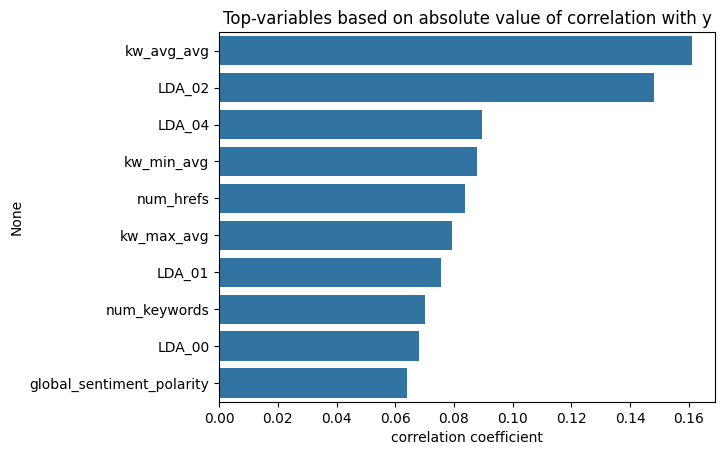

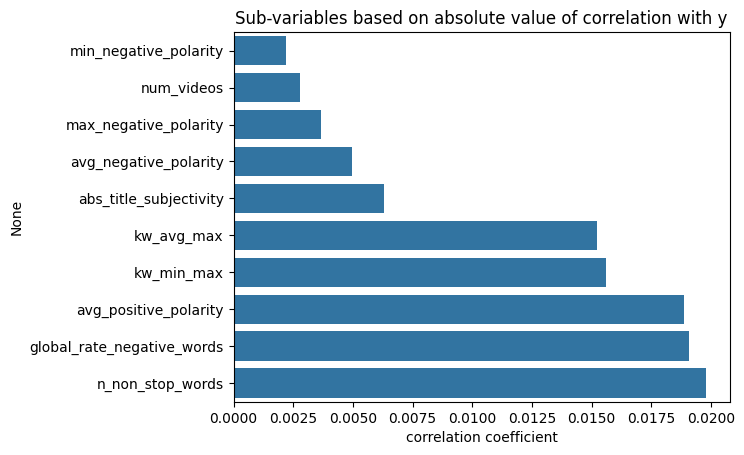

In [24]:
corr = X[num_cols].corrwith(y).sort_values(ascending=False)

sns.barplot(x=corr.abs().sort_values(ascending=False).head(10).values,
            y=corr.abs().sort_values(ascending=False).head(10).index)
plt.title('Top-variables based on absolute value of correlation with y')
plt.xlabel('correlation coefficient')
plt.show()

sns.barplot(x=corr.abs().sort_values(ascending=True).head(10).values,
            y=corr.abs().sort_values(ascending=True).head(10).index)
plt.title('Sub-variables based on absolute value of correlation with y')
plt.xlabel('correlation coefficient')
plt.show()

### ② Categorical vs. Target (y)

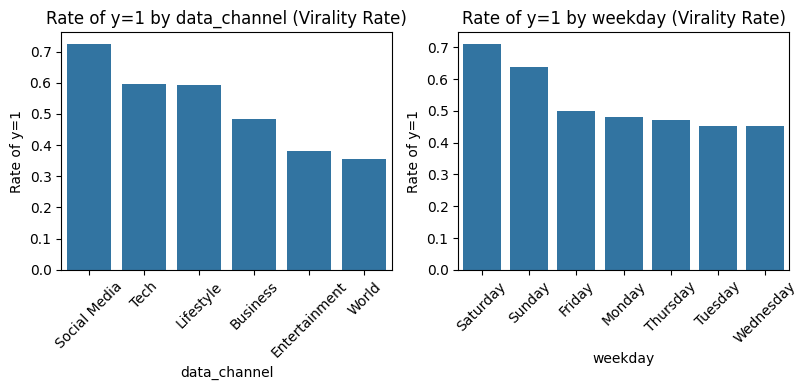

In [26]:
categorical_vars = ['data_channel', 'weekday']

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    temp_df = pd.concat([X[var], y], axis=1).dropna(subset=[var])

    # Calculate rate of y=1
    mean_y = temp_df.groupby(var)['y'].mean().reset_index()
    mean_y.columns = [var, 'viral_ratio']

    # Sort by rate of y=1 in descending order
    order = mean_y.sort_values('viral_ratio', ascending=False)[var]

    sns.barplot(x=var, y='viral_ratio', data=mean_y, ax=axes[i], order=order)
    axes[i].set_title(f'Rate of y=1 by {var} (Virality Rate)')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Rate of y=1')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

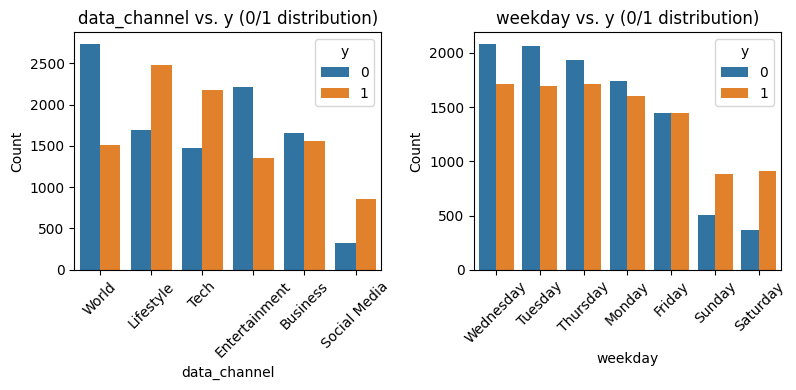

In [27]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    # Remove missing values
    temp_df = pd.concat([X[col], y], axis=1).dropna(subset=[col])

    order = temp_df[col].value_counts().index

    sns.countplot(x=col, hue='y', data=temp_df, order=order, ax=axes[i])
    axes[i].set_title(f"{col} vs. y (0/1 distribution)")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Hide remaining subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## (3) Multivariate Analysis

### ① Numerical vs. Numerical

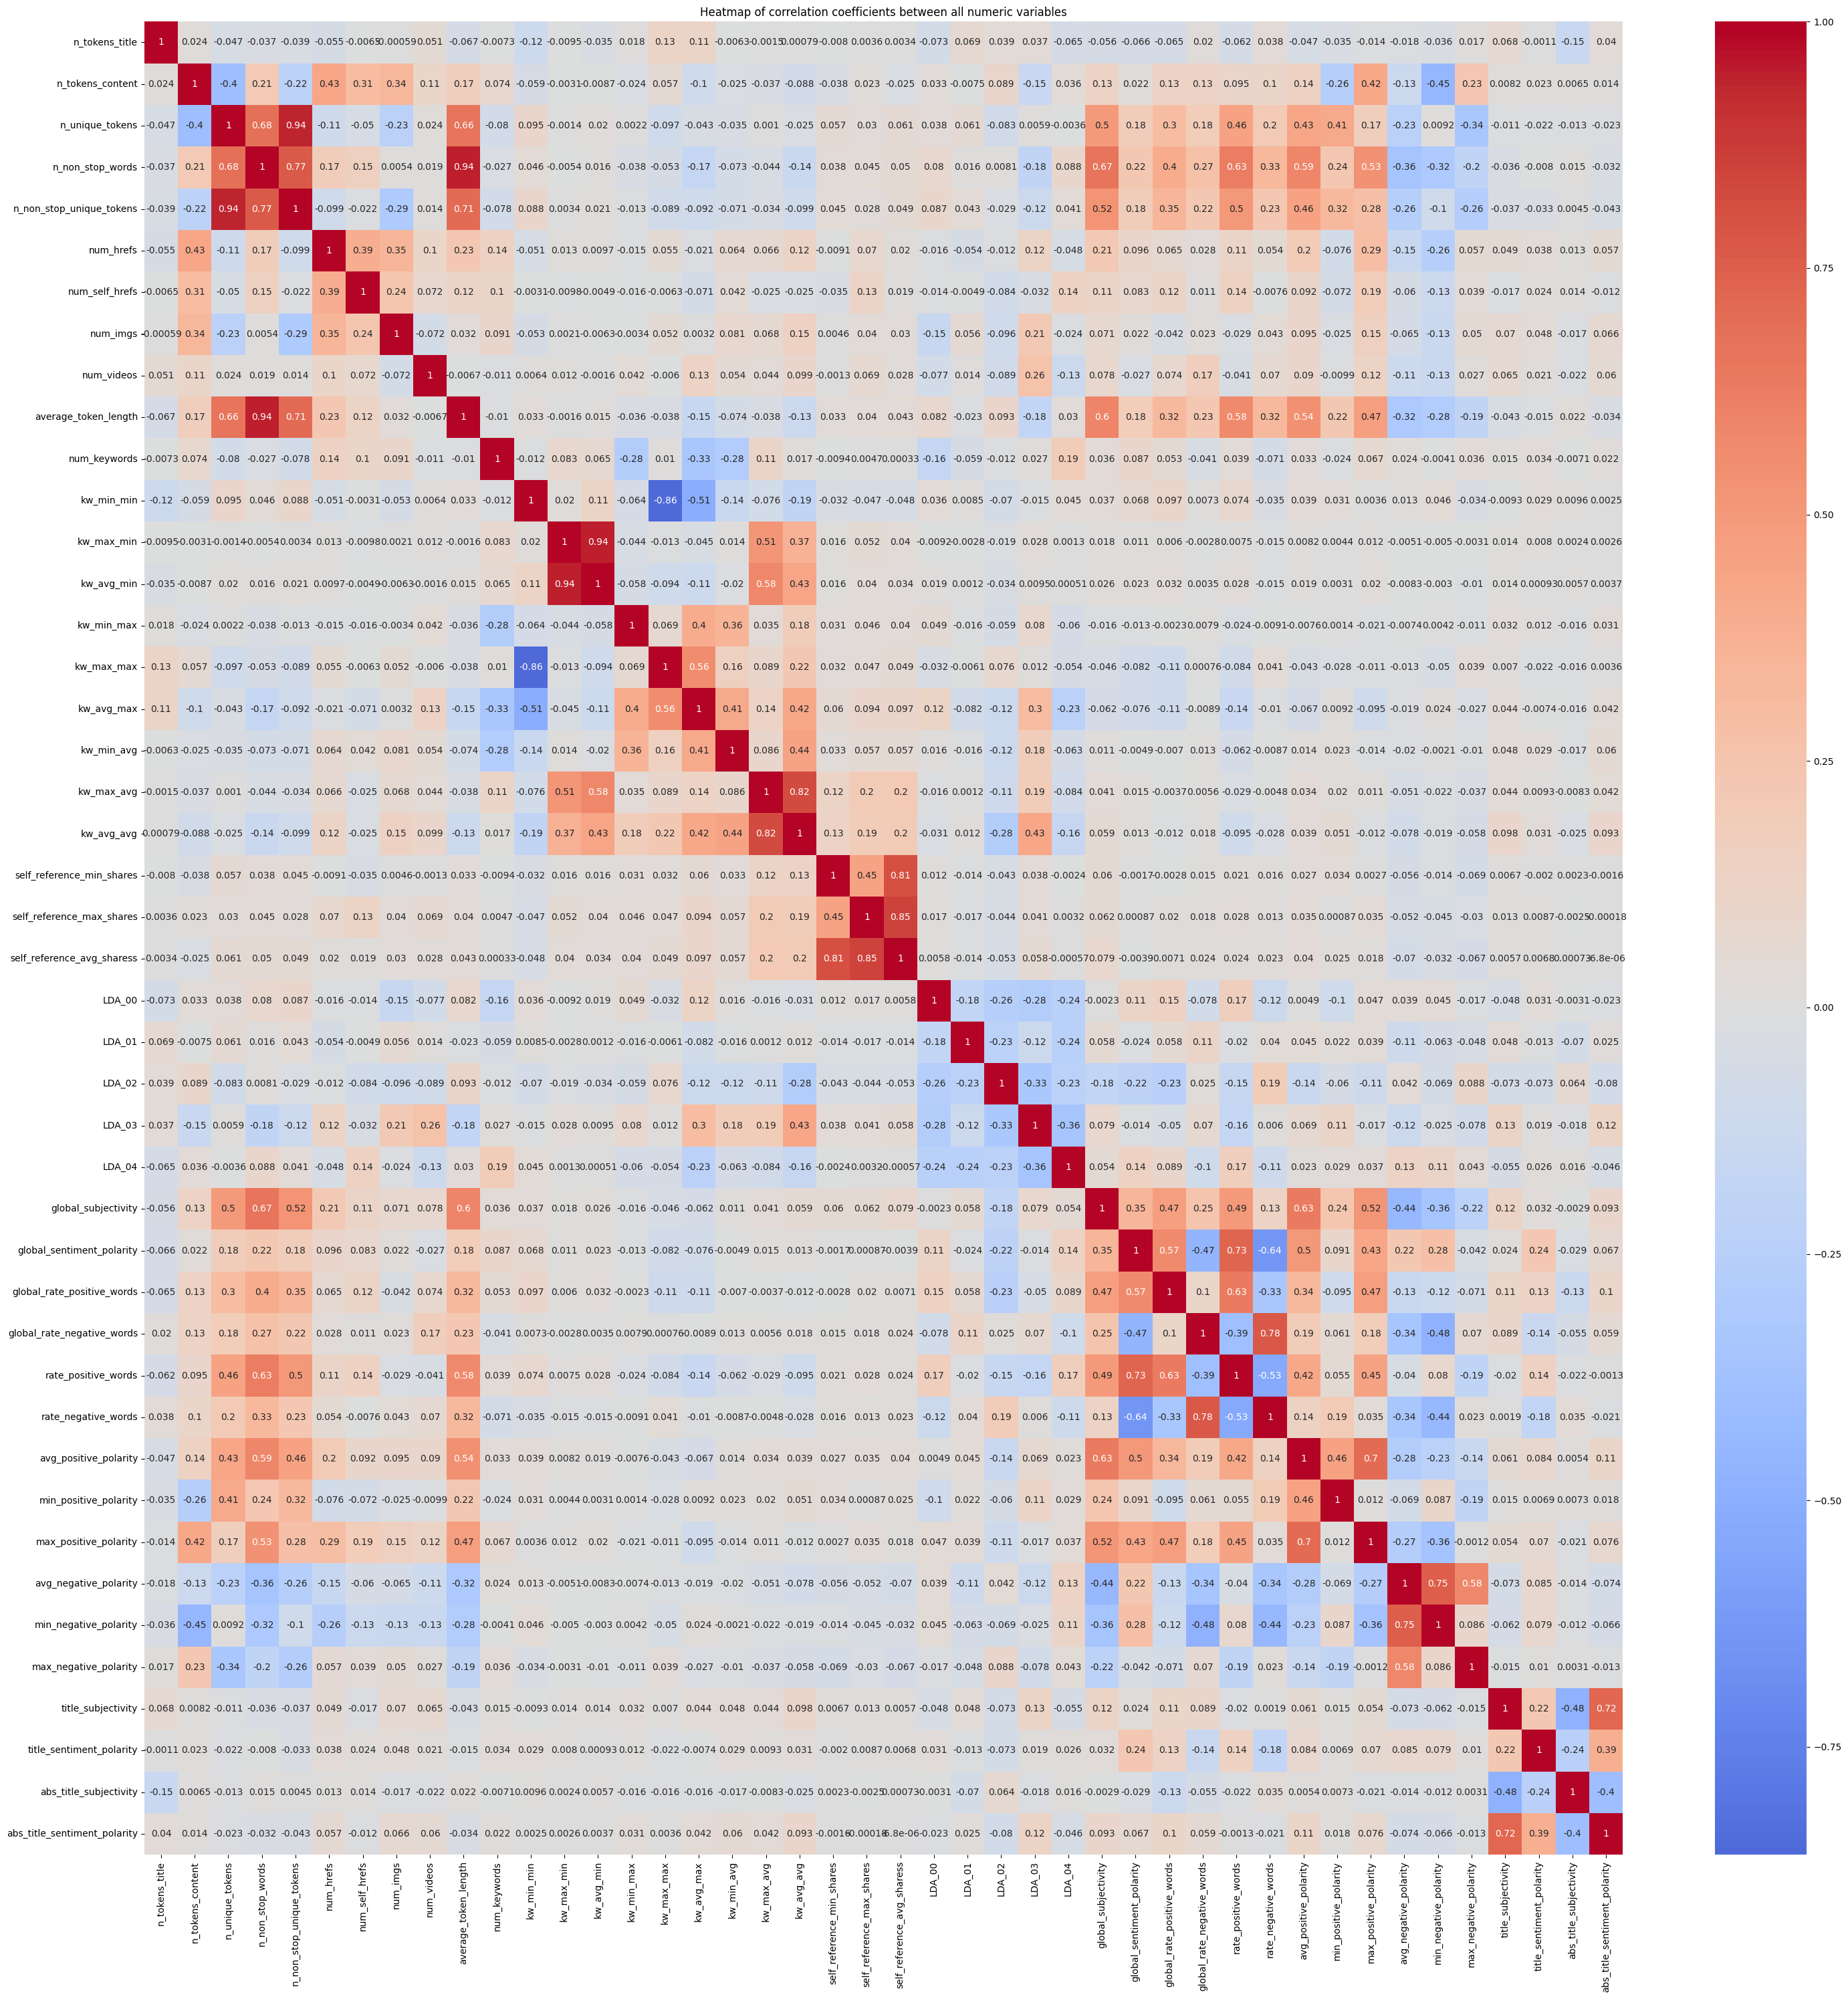

In [28]:
num_cols = X.select_dtypes(include='number').columns
corr = X[num_cols].corr()

plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap of correlation coefficients between all numeric variables")
plt.tight_layout()
plt.show()

In [29]:
corr_matrix = X[num_cols].corr().abs()
corr_unstacked = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
corr_series = corr_unstacked.unstack().dropna().sort_values(ascending=False)

sorted_pairs = corr_series.rename_axis(['var1', 'var2']).reset_index()
sorted_pairs[['var1', 'var2']] = np.sort(sorted_pairs[['var1', 'var2']], axis=1)
sorted_pairs = sorted_pairs.drop_duplicates(subset=['var1', 'var2'])

sorted_corr_series = sorted_pairs.set_index(['var1', 'var2'])[0].sort_values(ascending=False)

top_n = 14
top_corr_pairs = sorted_corr_series.head(top_n)

top_vars = list(set([var for pair in top_corr_pairs.index for var in pair]))

print("Top 14 correlated pairs:")
print(top_corr_pairs)
print("\nVariable list (top_vars):", top_vars)

Top 14 correlated pairs:
var1                          var2                     
kw_avg_min                    kw_max_min                   0.943714
average_token_length          n_non_stop_words             0.942168
n_non_stop_unique_tokens      n_unique_tokens              0.938879
kw_max_max                    kw_min_min                   0.859416
self_reference_avg_sharess    self_reference_max_shares    0.851193
kw_avg_avg                    kw_max_avg                   0.824573
self_reference_avg_sharess    self_reference_min_shares    0.805721
global_rate_negative_words    rate_negative_words          0.778147
n_non_stop_unique_tokens      n_non_stop_words             0.765921
avg_negative_polarity         min_negative_polarity        0.747897
global_sentiment_polarity     rate_positive_words          0.728204
abs_title_sentiment_polarity  title_subjectivity           0.719637
average_token_length          n_non_stop_unique_tokens     0.706165
avg_positive_polarity         max_p

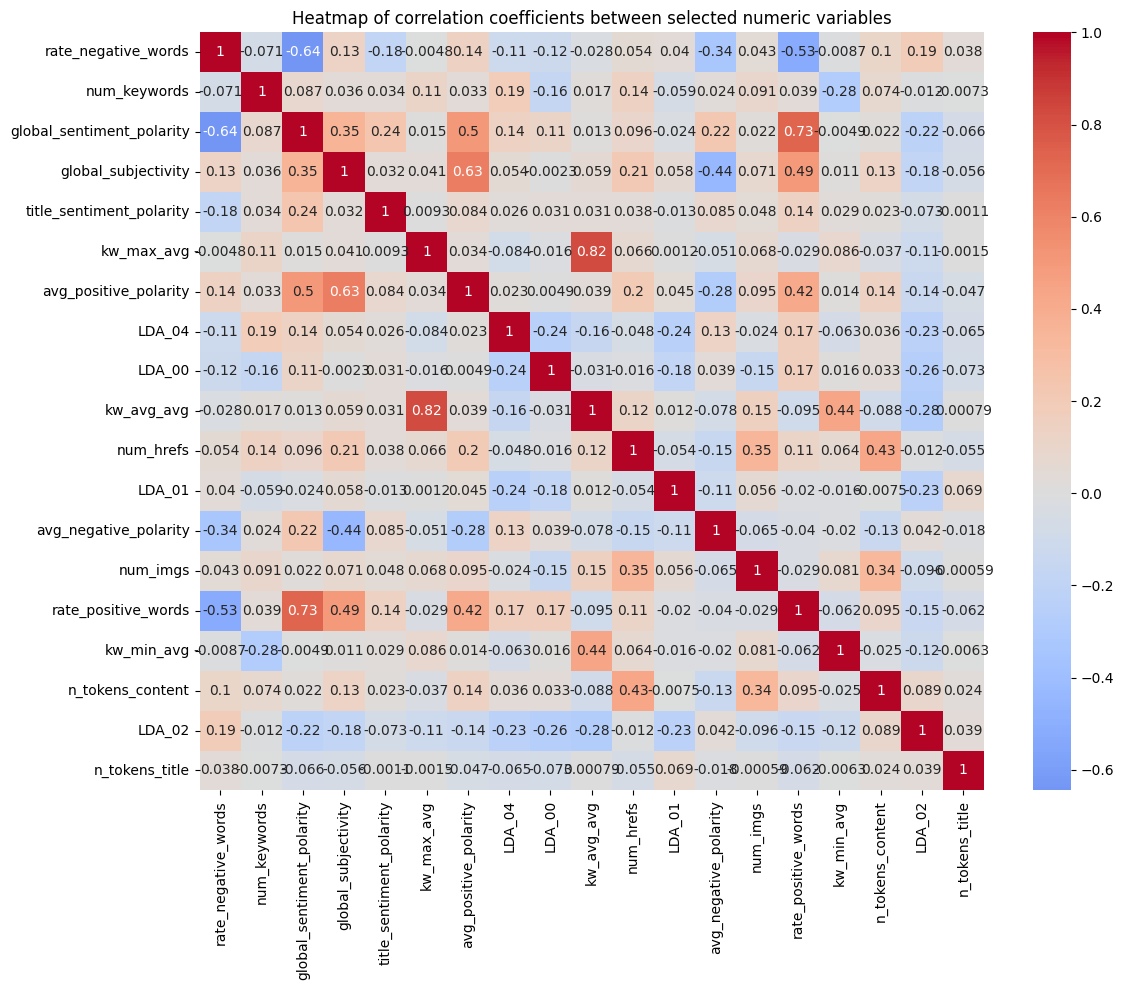

In [30]:
# Top 7 numeric variables highly correlated with y
top_corr_with_y = X[num_cols].corrwith(y).abs().sort_values(ascending=False).head(13).index.tolist()

# Domain-based numeric variables
domain_vars = [
    'n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs',
    'num_keywords', 'global_subjectivity', 'global_sentiment_polarity',
    'avg_positive_polarity', 'avg_negative_polarity',
    'rate_positive_words', 'title_sentiment_polarity'
]

# Integrate selected numeric variables
selected_num_vars = list(set(top_corr_with_y + domain_vars))

# Correlation heatmap
corr = X[selected_num_vars].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap of correlation coefficients between selected numeric variables")
plt.tight_layout()
plt.show()

### ② Categorical vs. Categorical

In [31]:
cat1 = 'data_channel'
cat2 = 'weekday'

cross_tab = pd.crosstab(X[cat1], X[cat2])
cross_tab

weekday        Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
data_channel                                                                 
Business          387     520       106     170       589      573        579
Entertainment     432     615       173     245       551      593        635
Lifestyle         585     566       288     340       650      665        699
Social Media      158     154        90      68       213      206        175
Tech              444     555       238     172       599      634        634
World             601     594       246     269       706      725        703

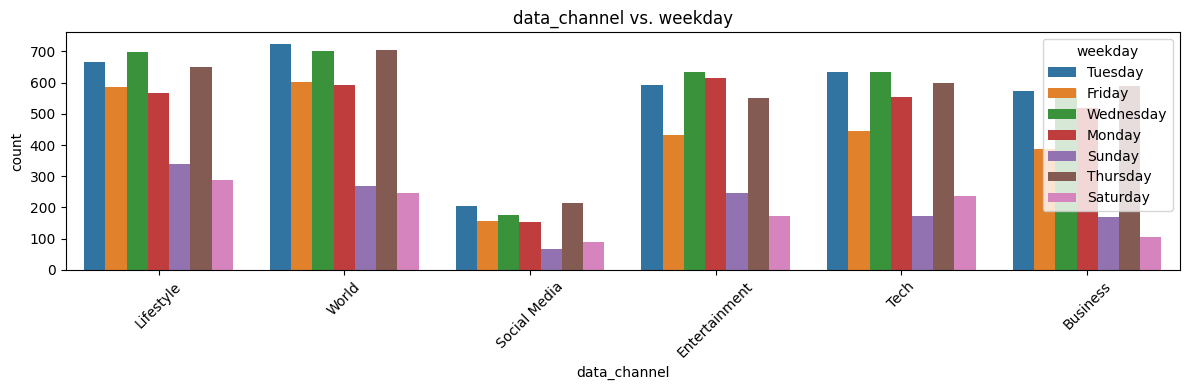

In [32]:
plt.figure(figsize=(12, 4))
sns.countplot(x=cat1, hue=cat2, data=X)
plt.title(f'{cat1} vs. {cat2}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ③ Numerical vs. Categorical

#### --- Group by weekday

In [33]:
num_cols = X.select_dtypes(include='number').columns

# Check 'weekday' variable (Remove missing values)
X_temp = X[['weekday'] + list(num_cols)].dropna(subset=['weekday'])

n_cols = 5
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Boxplot visualization by day of the week for each numerical variable
for i, col in enumerate(num_cols):
    sns.boxplot(x='weekday', y=col, data=X_temp, ax=axes[i])
    axes[i].set_title(f"{col} by weekday")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### --- Grouping by data_channel

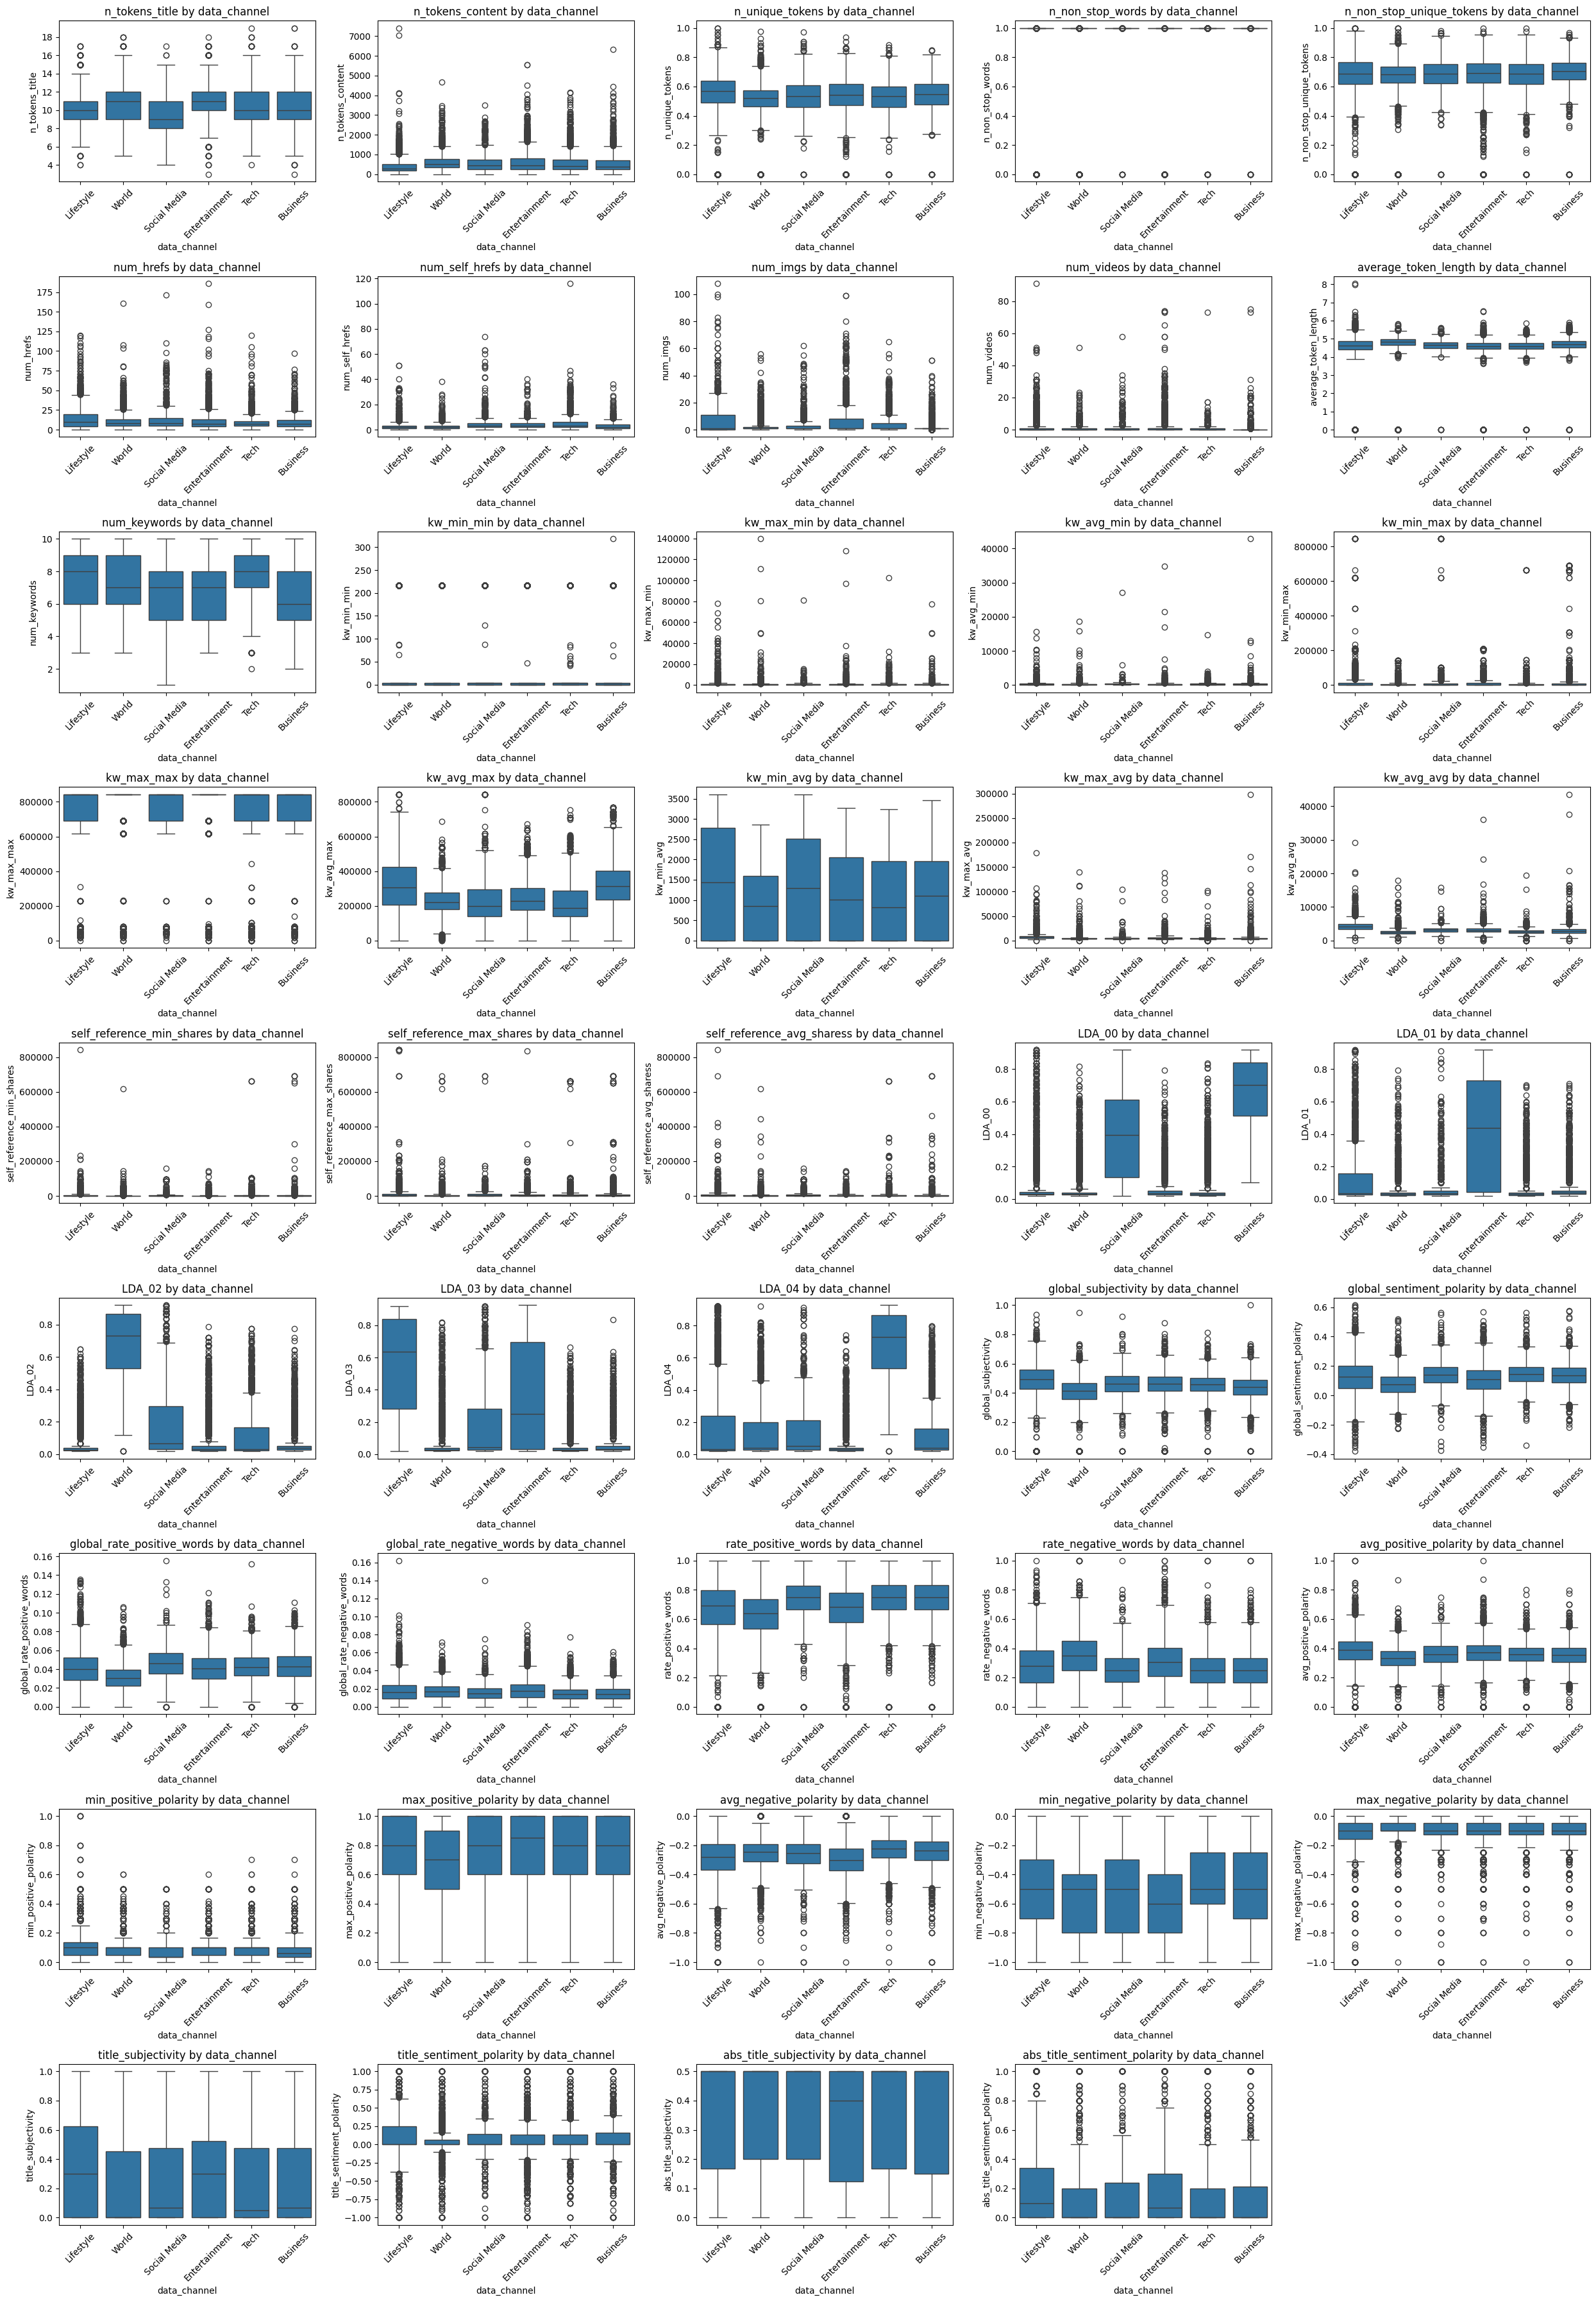

In [34]:
num_cols = X.select_dtypes(include='number').columns

# Remove missing values ​​based on 'data_channel'
X_temp = X[['data_channel'] + list(num_cols)].dropna(subset=['data_channel'])

n_cols = 5
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Boxplot visualization by data_channel for each numerical variable
for i, col in enumerate(num_cols):
    sns.boxplot(x='data_channel', y=col, data=X_temp, ax=axes[i])
    axes[i].set_title(f"{col} by data_channel")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

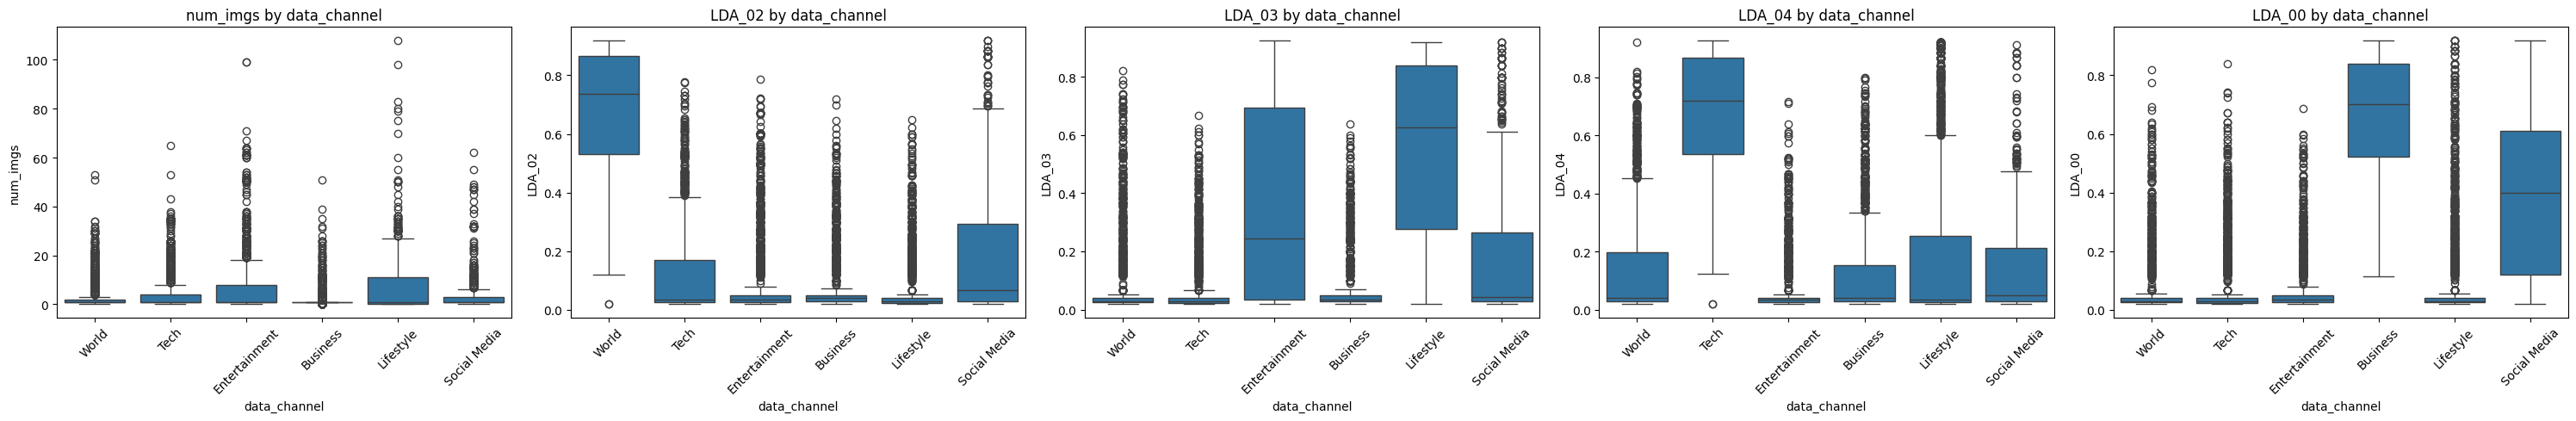

In [35]:
meaningful_data_channel_vars = [
    'num_imgs',
    'LDA_02',
    'LDA_03',
    'LDA_04',
    'LDA_00',
]

X_temp = X[['data_channel'] + meaningful_data_channel_vars].dropna()

n_cols = 6
n_rows = int(np.ceil(len(meaningful_data_channel_vars) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Boxplot
for i, col in enumerate(meaningful_data_channel_vars):
    sns.boxplot(x='data_channel', y=col, data=X_temp, ax=axes[i])
    axes[i].set_title(f"{col} by data_channel")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### ④ PCA visualization

In [36]:
# 2D PCA criteria
num_X = X.select_dtypes(include='number')
X_clean = num_X.dropna()

y_clean = y.loc[X_clean.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_clean.index)
pca_df['y'] = y_clean

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='y', alpha=0.6)
plt.title("PCA results (2D principal component space)")
plt.tight_layout()
plt.show()

print("Variance explained by each principal component:\n", pca.explained_variance_ratio_)

Variance explained by each principal component:
 [0.13987914 0.0948107 ]


#### --- PCA Cumulative explained variance Graph

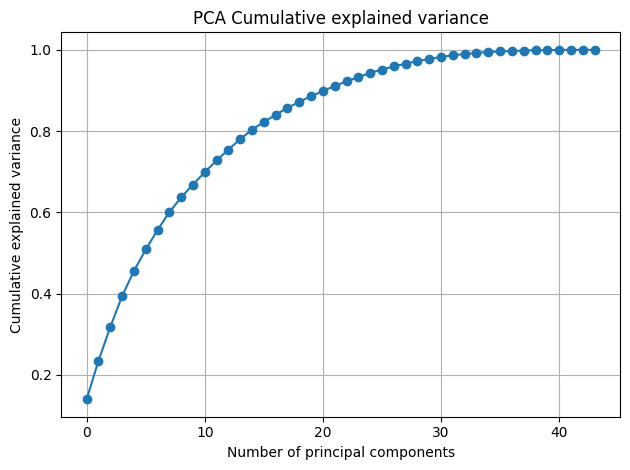

Number of principal components for 90% explained variance: 22


In [37]:
# Total PCA
pca_full = PCA()
pca_full.fit(X_scaled)

# Cumulative explained variance
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Cumulative explained variance')
plt.grid(True)
plt.tight_layout()
plt.show()

explained = np.cumsum(pca_full.explained_variance_ratio_)
n_components_90 = np.argmax(explained >= 0.9) + 1
print(f"Number of principal components for 90% explained variance: {n_components_90}")

### ⑤ K-Means clustering analysis

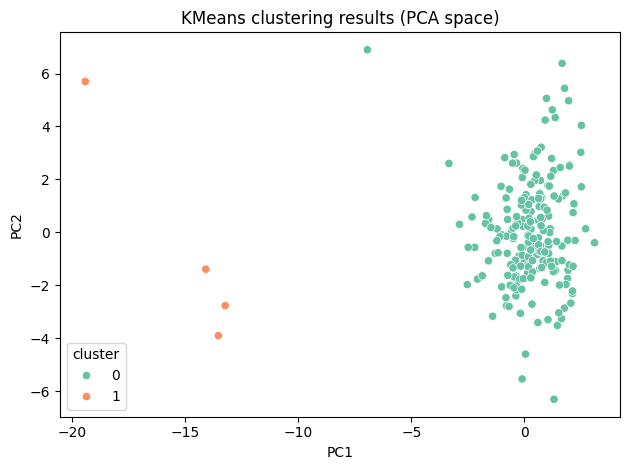

Variance explained by principal components:
 [0.13987914 0.0948107 ]


In [38]:
# K-means clustering (using 2D PCA data)
kmeans = KMeans(n_clusters=2, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(X_pca)

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("KMeans clustering results (PCA space)")
plt.tight_layout()
plt.show()

print("Variance explained by principal components:\n", pca.explained_variance_ratio_)

#### --- Cluster consistency evaluation (confusion matrix)

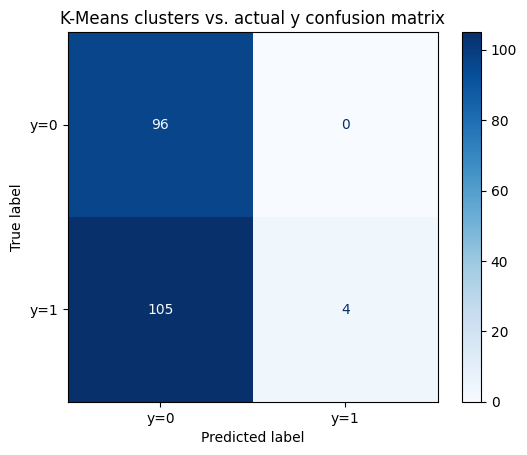

Accuracy similarity (cluster vs. y): 0.49
Max similarity regardless of order (y vs. cluster): 0.51


In [39]:
# 2D PCA criteria
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

pca_df['cluster'] = clusters

aligned_y = y.loc[pca_df.index]
aligned_cluster = pca_df['cluster']

cm = confusion_matrix(aligned_y, aligned_cluster)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["y=0", "y=1"])
disp.plot(cmap="Blues")
plt.title("K-Means clusters vs. actual y confusion matrix")
plt.show()

acc = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"Accuracy similarity (cluster vs. y): {acc:.2f}")


# Also compare reverse confusion matrix
cm_flipped = confusion_matrix(aligned_y, 1 - aligned_cluster)

acc1 = (cm[0,0] + cm[1,1]) / cm.sum()
acc2 = (cm_flipped[0,0] + cm_flipped[1,1]) / cm_flipped.sum()
best_acc = max(acc1, acc2)

print(f"Max similarity regardless of order (y vs. cluster): {best_acc:.2f}")

### ⑥ Assessing variable importance and statistical significance using logistic regression

In [40]:
import statsmodels.api as sm

# Select key variables + Remove missing values
selected = ['n_tokens_content', 'num_hrefs', 'num_keywords', 'global_subjectivity']
X_selected = X[selected].dropna()
y_aligned = y.loc[X_selected.index]

# Add constant term
X_const = sm.add_constant(X_selected)

# Fit logistic regression model
logit_model = sm.Logit(y_aligned, X_const).fit()

print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.686593
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14552
Model:                          Logit   Df Residuals:                    14547
Method:                           MLE   Df Model:                            4
Date:                Sat, 31 May 2025   Pseudo R-squ.:                0.009347
Time:                        12:59:32   Log-Likelihood:                -9991.3
converged:                       True   LL-Null:                       -10086.
Covariance Type:            nonrobust   LLR p-value:                 1.097e-39
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.9670      0.091    -10.600      0.000      -1.146      -0.788
n_



---



# MODEL


---



In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
!pip install optuna catboost matplotlib seaborn scikit-learn pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 10.5 MB/s eta 0:00:00


In [43]:
import os
import time
import warnings
import logging
import joblib
import shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import shap
import optuna

from datetime import datetime

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix,
    precision_recall_curve, roc_curve, auc, make_scorer,
    precision_score, recall_score, balanced_accuracy_score,
    log_loss, matthews_corrcoef, classification_report
)
from sklearn.inspection import permutation_importance

from catboost import CatBoostClassifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# ========= CONFIG ===========================================================
RAW_CSV         = '/content/drive/MyDrive/Colab Notebooks/패턴인식/data/train.csv'
BASE_DIR        = '/content/drive/MyDrive/Colab Notebooks/패턴인식'
USE_GPU         = False             # Use True when using Colab GPU
GPU_DEVICES     = "0"
GPU_RAM_PART    = 0.50              # GPU memory usage ratio (CatBoost only)
GLOBAL_SEED     = 42

N_TRIALS_OPTUNA = 30                # Number of Optuna trials
SEARCH_N_JOBS   = 1                 # Number of parallel Optuna workers
TRAIN_ITER      = 200               # Number of iterations common to trial-/final-model
EARLY_STOP      = 50
N_DPND_FEATS    = 3                 # Number of top features for SHAP dependence plot
# ============================================================================

start_time = time.time()

if USE_GPU:
    os.environ["CUDA_VISIBLE_DEVICES"] = GPU_DEVICES
else:
    os.environ.pop("CUDA_VISIBLE_DEVICES", None)

np.random.seed(GLOBAL_SEED)

# -------- Create result directory ------------------------------------------------
log_root   = os.path.join(BASE_DIR, 'log')
timestamp  = datetime.now().strftime('%Y%m%d_%H%M%S')
RES_DIR    = os.path.join(log_root, f'optuna_run_{timestamp}')
PLOT_DIR   = os.path.join(RES_DIR, 'img')

os.makedirs(RES_DIR, exist_ok=True)
os.makedirs(PLOT_DIR, exist_ok=True)

MODEL_CBM  = os.path.join(RES_DIR, 'final_model.cbm')
FI_CSV     = os.path.join(RES_DIR, 'feature_importances.csv')
PI_CSV     = os.path.join(RES_DIR, 'permutation_importances.csv')
LOG_TXT    = os.path.join(RES_DIR, 'log.txt')

logging.root.handlers.clear()

logging.basicConfig(
    level    = logging.INFO,
    format   = "%(asctime)s [%(levelname)s] %(message)s",
    handlers = [logging.FileHandler(LOG_TXT), logging.StreamHandler()]
)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

logger.info("===== START SCRIPT =====")
logger.info("CUDA_VISIBLE_DEVICES=%s", os.getenv("CUDA_VISIBLE_DEVICES", "CPU"))


# ============================================================================
# 1. Data Load & Derived Feature creation
# ============================================================================
logger.info("1) Loading data from: %s", RAW_CSV)
df = pd.read_csv(RAW_CSV)
# Drop 'id', 'shares'; use 'y' as target
X_full = df.drop(columns=['id', 'shares', 'y'], errors='ignore').copy()
y_full = df['y'].copy()

EPS = 1e-6
def add_derived(df_):
    df_ = df_.copy()
    if {'n_tokens_content','num_imgs'}.issubset(df_.columns):
        df_['feat_content_to_img_ratio'] = df_['n_tokens_content'] / (df_['num_imgs'] + EPS)
    if {'global_subjectivity','global_sentiment_polarity'}.issubset(df_.columns):
        df_['feat_global_sentiment_strength'] = df_['global_subjectivity'] * df_['global_sentiment_polarity']
    if {'n_tokens_content','num_hrefs'}.issubset(df_.columns):
        df_['feat_content_to_href_ratio'] = df_['n_tokens_content'] / (df_['num_hrefs'] + EPS)
    return df_

X_full = add_derived(X_full)

# Train/Validation Hold-out split
X_tr, X_val, y_tr, y_val = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=GLOBAL_SEED
)
logger.info("   - Train shape: %s, Validation shape: %s", X_tr.shape, X_val.shape)

# Missing value handling: numeric → median, categorical → 'missing'
num_cols = X_tr.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in ['data_channel', 'weekday'] if c in X_tr.columns]

meds = X_tr[num_cols].median()
X_tr[num_cols]  = X_tr[num_cols].fillna(meds)
X_val[num_cols] = X_val[num_cols].fillna(meds)

if cat_cols:
    for c in cat_cols:
        X_tr[c].fillna('missing', inplace=True)
        X_val[c].fillna('missing', inplace=True)
else:
    logger.info("No categorical columns identified for imputation.")

# Calculate class imbalance weights
pos, neg = (y_tr == 1).sum(), (y_tr == 0).sum()
scale_pos_weight = neg / pos if pos else 1.0
logger.info("scale_pos_weight=%.3f  (neg=%d, pos=%d)", scale_pos_weight, neg, pos)


# ============================================================================
# 2. Custom CompositeMetric for CatBoost
# ============================================================================
class CompositeMetric:
    def get_final_error(self, error, weight):
        return error / (weight + 1e-10)
    def is_max_optimal(self):
        return True
    def evaluate(self, approxes, target, weight):
        prob = 1.0 / (1.0 + np.exp(-approxes[0]))
        pred = (prob >= 0.5).astype(int)
        m = (accuracy_score(target, pred)
             + f1_score(target, pred)
             + roc_auc_score(target, prob)) / 3
        return m, 1.0


# ============================================================================
# 3. Define Optuna Objective
# ============================================================================
def cb_params(trial):
    return {
        'iterations'           : TRAIN_ITER,
        'learning_rate'        : trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'depth'                : trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg'          : trial.suggest_float('l2_leaf_reg', 1.0, 12.0, log=True),
        'border_count'         : trial.suggest_int('border_count', 32, 254),
        'bagging_temperature'  : trial.suggest_float('bagging_temperature', 0.0, 2.0),
        'random_strength'      : trial.suggest_float('random_strength', 0.1, 5.0, log=True),
        'colsample_bylevel'    : trial.suggest_float('colsample_bylevel', 0.6, 1.0),
        'task_type'            : 'GPU' if USE_GPU else 'CPU',
        'devices'              : GPU_DEVICES if USE_GPU else None,
        'gpu_ram_part'         : GPU_RAM_PART if USE_GPU else None,
        'scale_pos_weight'     : scale_pos_weight,
        'eval_metric'          : CompositeMetric(),
        'early_stopping_rounds': EARLY_STOP,
        'use_best_model'       : True,
        'verbose'              : False,
        'random_state'         : GLOBAL_SEED,
    }

def objective(trial):
    params = cb_params(trial)
    model = CatBoostClassifier(**params)
    model.fit(
        X_tr, y_tr,
        cat_features=cat_cols or None,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    # Return optimal CompositeMetric
    return model.get_best_score()['validation']['CompositeMetric']

logger.info("Optuna search (%d trials) start", N_TRIALS_OPTUNA)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=N_TRIALS_OPTUNA, n_jobs=SEARCH_N_JOBS, show_progress_bar=True)

best_params = study.best_params
best_score  = study.best_value
logger.info("Optuna best params: %s  |  best Composite=%.4f", best_params, best_score)


# ============================================================================
# 4. Train Final Model
# ============================================================================
# Train with best_params found by Optuna
final_params = cb_params(optuna.trial.FixedTrial(best_params))
final_params.update({'iterations': TRAIN_ITER, 'verbose': 20})

final_model = CatBoostClassifier(**final_params)
final_model.fit(
    X_tr, y_tr,
    cat_features=cat_cols or None,
    eval_set=[(X_val, y_val)]
)

best_iter = final_model.get_best_iteration()
logger.info("Best iteration via early-stopping: %d", best_iter)
final_model.save_model(MODEL_CBM)


# ============================================================================
# 5. Learning-Curve Plot (Logloss & Composite Proxy)
# ============================================================================
def save_learning_curve(metric_key, fname):
    ev  = final_model.get_evals_result()
    tr  = ev['learn'][metric_key]
    val = ev['validation'][metric_key]
    plt.figure(figsize=(6,4))
    plt.plot(tr,  label=f'train {metric_key}')
    plt.plot(val, label=f'valid {metric_key}')
    plt.xlabel('Iteration')
    plt.ylabel(metric_key)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, fname), dpi=300)
    plt.close()

save_learning_curve('Logloss', 'learning_curve_logloss.jpg')
save_learning_curve('CompositeMetric', 'learning_curve_composite.jpg')


# ============================================================================
# 6. Hold-Out Validation performance evaluation
# ============================================================================
logger.info("6) Hold-out Validation Performance")
y_prob = final_model.predict_proba(X_val)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# Calculate main metrics
acc_val            = accuracy_score(y_val, y_pred)
precision_val      = precision_score(y_val, y_pred)
recall_val         = recall_score(y_val, y_pred)
f1_val             = f1_score(y_val, y_pred)
auc_val            = roc_auc_score(y_val, y_prob)
mcc_val            = matthews_corrcoef(y_val, y_pred)
balanced_acc_val   = balanced_accuracy_score(y_val, y_pred)
logloss_val        = log_loss(y_val, y_prob)
comp_val           = (acc_val + f1_val + auc_val) / 3

# Calculate Top-K Precision (top 10% positive)
k_val              = max(1, int(0.1 * sum(y_val)))
top_k_indices_val  = np.argsort(y_prob)[-k_val:]
top_k_precision_val = sum(y_val.iloc[top_k_indices_val]) / k_val

logger.info("Hold-out Acc=%.4f  Precision=%.4f  Recall=%.4f  F1=%.4f  AUC=%.4f",
            acc_val, precision_val, recall_val, f1_val, auc_val)
logger.info("       MCC=%.4f  BalAcc=%.4f  LogLoss=%.4f  Composite=%.4f  Top-%d Precision=%.4f",
            mcc_val, balanced_acc_val, logloss_val, comp_val, k_val, top_k_precision_val)

# Confusion Matrix (Hold-out)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Popular','Popular'],
            yticklabels=['Not Popular','Popular'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Hold-out)')
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, 'confusion_matrix_holdout.jpg'), dpi=300)
plt.close()

# Classification Report (Hold-out)
class_report = classification_report(y_val, y_pred, target_names=['Not Popular','Popular'])
logger.info("\nClassification Report (Hold-out):\n%s", class_report)

# Precision-Recall Curve (Hold-out)
prec_curve, rec_curve, _ = precision_recall_curve(y_val, y_prob)
pr_auc_val               = auc(rec_curve, prec_curve)
plt.figure(figsize=(6,4))
plt.plot(rec_curve, prec_curve, label=f'PR AUC={pr_auc_val:.4f}', lw=2)
plt.axhline(y=sum(y_val)/len(y_val), color='red', lw=1, linestyle='--',
            label=f'Baseline={sum(y_val)/len(y_val):.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Hold-out)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, 'pr_curve_holdout.jpg'), dpi=300)
plt.close()

# ROC Curve (Hold-out)
fpr, tpr, _ = roc_curve(y_val, y_prob)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={roc_auc_val:.4f}', lw=2)
plt.plot([0,1],[0,1],'--', lw=1, color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Hold-out)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, 'roc_curve_holdout.jpg'), dpi=300)
plt.close()


# ============================================================================
# 7. 5-Fold Cross-Validation (Manual Loop)
# ============================================================================
logger.info("7) 5-Fold Cross-Validation")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=GLOBAL_SEED)

acc_scores, f1_scores, roc_auc_scores = [], [], []
precision_scores, recall_scores = [], []
bal_acc_scores, logloss_scores = [], []
mcc_scores = []
topk_scores = []

# If best_iter is ≤ 0, adjust to 1
n_iter = best_iter if (best_iter and best_iter > 0) else 1

for fold_id, (train_idx, valid_idx) in enumerate(skf.split(X_tr, y_tr), start=1):
    X_tr_fold, X_va_fold = X_tr.iloc[train_idx], X_tr.iloc[valid_idx]
    y_tr_fold, y_va_fold = y_tr.iloc[train_idx], y_tr.iloc[valid_idx]

    # Create models per fold (same best_params + iterations)
    fold_model = CatBoostClassifier(
        iterations=n_iter,
        task_type='GPU' if USE_GPU else 'CPU',
        verbose=0,
        random_state=GLOBAL_SEED,
        scale_pos_weight=scale_pos_weight,
        **best_params
    )

    fold_model.fit(
        X_tr_fold, y_tr_fold,
        cat_features=cat_cols or None,
        eval_set=[(X_va_fold, y_va_fold)],
        verbose=False
    )

    y_va_prob = fold_model.predict_proba(X_va_fold)[:, 1]
    y_va_pred = (y_va_prob >= 0.5).astype(int)

    acc_f        = accuracy_score(y_va_fold, y_va_pred)
    f1_f         = f1_score(y_va_fold, y_va_pred)
    roc_auc_f    = roc_auc_score(y_va_fold, y_va_prob)
    precision_f  = precision_score(y_va_fold, y_va_pred)
    recall_f     = recall_score(y_va_fold, y_va_pred)
    bal_acc_f    = balanced_accuracy_score(y_va_fold, y_va_pred)
    logloss_f    = log_loss(y_va_fold, y_va_prob)
    mcc_f        = matthews_corrcoef(y_va_fold, y_va_pred)

    # Top-K Precision (top 10% positive)
    k_fold       = max(1, int(0.1 * sum(y_va_fold)))
    topk_idx     = np.argsort(y_va_prob)[-k_fold:]
    topk_prec_f  = sum(y_va_fold.iloc[topk_idx]) / k_fold

    # Append to list
    acc_scores.append(acc_f)
    f1_scores.append(f1_f)
    roc_auc_scores.append(roc_auc_f)
    precision_scores.append(precision_f)
    recall_scores.append(recall_f)
    bal_acc_scores.append(bal_acc_f)
    logloss_scores.append(logloss_f)
    mcc_scores.append(mcc_f)
    topk_scores.append(topk_prec_f)

    # Print logs per fold
    logger.info(
        "Fold %d ➔ Acc=%.4f  F1=%.4f  ROC_AUC=%.4f  Prec=%.4f  Recall=%.4f  BalAcc=%.4f  MCC=%.4f  LogLoss=%.4f  Top-%d_Prec=%.4f",
        fold_id, acc_f, f1_f, roc_auc_f, precision_f, recall_f, bal_acc_f, mcc_f, logloss_f, k_fold, topk_prec_f
    )

# Function to calculate mean and standard deviation
def mean_std(lst):
    return np.mean(lst), np.std(lst)

acc_mean,    acc_std    = mean_std(acc_scores)
f1_mean,     f1_std     = mean_std(f1_scores)
roc_mean,    roc_std    = mean_std(roc_auc_scores)
prec_mean,   prec_std   = mean_std(precision_scores)
rec_mean,    rec_std    = mean_std(recall_scores)
bal_mean,    bal_std    = mean_std(bal_acc_scores)
ll_mean,     ll_std     = mean_std(logloss_scores)
mcc_mean,    mcc_std    = mean_std(mcc_scores)
topk_mean,   topk_std   = mean_std(topk_scores)

logger.info("\n=== 5-Fold CV Results (Mean ± 2*STD) ===")
logger.info("Accuracy:          %.4f (+/- %.4f)", acc_mean,    acc_std * 2)
logger.info("F1 Score:          %.4f (+/- %.4f)", f1_mean,     f1_std * 2)
logger.info("ROC AUC:           %.4f (+/- %.4f)", roc_mean,    roc_std * 2)
logger.info("Precision:         %.4f (+/- %.4f)", prec_mean,   prec_std * 2)
logger.info("Recall:            %.4f (+/- %.4f)", rec_mean,    rec_std * 2)
logger.info("Balanced Accuracy: %.4f (+/- %.4f)", bal_mean,    bal_std * 2)
logger.info("Log Loss:          %.4f (+/- %.4f)", ll_mean,     ll_std * 2)
logger.info("MCC:               %.4f (+/- %.4f)", mcc_mean,    mcc_std * 2)
logger.info("Top-10%% Precision: %.4f (+/- %.4f)", topk_mean,   topk_std * 2)


# ============================================================================
# 8. Feature Importance & Permutation Importance
# ============================================================================
logger.info("8) Feature Importance")
# Built-in Feature Importance (prettified=True)
fi = final_model.get_feature_importance(prettified=True)
fi.to_csv(FI_CSV, index=False)

logger.info("   Permutation Importance ")
def composite_scorer_func(y_true, y_pred_proba, **kw):
    prob = y_pred_proba[:, 1] if y_pred_proba.ndim == 2 else y_pred_proba
    pred = (prob >= 0.5).astype(int)
    return (accuracy_score(y_true, pred)
            + f1_score(y_true, pred)
            + roc_auc_score(y_true, prob)) / 3

custom_scorer = make_scorer(composite_scorer_func, needs_proba=True)

pi = permutation_importance(
    final_model, X_val, y_val,
    scoring=custom_scorer,
    n_repeats=5, random_state=GLOBAL_SEED, n_jobs=-1
)
pi_df = pd.DataFrame({
    'feature'        : X_val.columns,
    'importance_mean': pi.importances_mean,
    'importance_std' : pi.importances_std
})
pi_df.to_csv(PI_CSV, index=False)


# ============================================================================
# 9. SHAP Summary & Dependence Plot
# ============================================================================
logger.info("9) SHAP")
explainer = shap.TreeExplainer(final_model)
shap_vals = explainer.shap_values(X_val, check_additivity=False)

# SHAP Summary Plot
plt.figure(figsize=(8,6))
shap.summary_plot(shap_vals, X_val, show=False)
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, 'shap_summary.jpg'), dpi=300)
plt.close()

# SHAP Dependence Plot: extract top N_DPND_FEATS from 'Feature Id' column
top_feats = fi.sort_values('Importances', ascending=False)['Feature Id'].head(N_DPND_FEATS)
for feat in top_feats:
    plt.figure(figsize=(6,4))
    shap.dependence_plot(feat, shap_vals, X_val,
                         interaction_index='auto', show=False)
    fn = f"shap_dependence_{feat.replace('/','_')}.jpg"
    plt.tight_layout()
    plt.savefig(os.path.join(PLOT_DIR, fn), dpi=300)
    plt.close()


# ============================================================================
# 10. Log summary and completion
# ============================================================================
elapsed = time.time() - start_time if 'start_time' in globals() else 0
h, m, s = int(elapsed // 3600), int((elapsed % 3600) // 60), int(elapsed % 60)
logger.info("Total runtime: %dh %dm %ds", h, m, s)
logger.info("Artifacts saved to %s", RES_DIR)

2025-05-31 13:00:02,152 [INFO] ===== START SCRIPT =====
2025-05-31 13:00:02,160 [INFO] CUDA_VISIBLE_DEVICES=CPU
2025-05-31 13:00:02,169 [INFO] 1) Loading data from: /content/drive/MyDrive/Colab Notebooks/패턴인식/data/train.csv
2025-05-31 13:00:03,161 [INFO]    - Train shape: (17760, 49), Validation shape: (4440, 49)
2025-05-31 13:00:03,380 [INFO] scale_pos_weight=1.017  (neg=8957, pos=8803)
2025-05-31 13:00:03,386 [INFO] Optuna search (30 trials) start
[I 2025-05-31 13:00:03,393] A new study created in memory with name: no-name-69a05ce7-9404-4102-bf77-898653da247c


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-05-31 13:00:44,041] Trial 0 finished with value: 0.689377847413963 and parameters: {'learning_rate': 0.03902179963745035, 'depth': 7, 'l2_leaf_reg': 2.517207744601025, 'border_count': 184, 'bagging_temperature': 1.3315196822774324, 'random_strength': 0.3162429629511489, 'colsample_bylevel': 0.7841167829363207}. Best is trial 0 with value: 0.689377847413963.
[I 2025-05-31 13:02:33,381] Trial 1 finished with value: 0.6875454001357023 and parameters: {'learning_rate': 0.06181486041337846, 'depth': 10, 'l2_leaf_reg': 1.624903168189951, 'border_count': 217, 'bagging_temperature': 1.8259393343862707, 'random_strength': 0.4865060377904347, 'colsample_bylevel': 0.9737640305262157}. Best is trial 0 with value: 0.689377847413963.
[I 2025-05-31 13:03:02,711] Trial 2 finished with value: 0.6869538068039263 and parameters: {'learning_rate': 0.0399231385440021, 'depth': 4, 'l2_leaf_reg': 10.757903957126551, 'border_count': 65, 'bagging_temperature': 1.690707876905004, 'random_strength': 0.27

2025-05-31 13:13:37,939 [INFO] Optuna best params: {'learning_rate': 0.06482897599324636, 'depth': 10, 'l2_leaf_reg': 4.177778581052454, 'border_count': 208, 'bagging_temperature': 0.8891041688102458, 'random_strength': 0.23671061387511708, 'colsample_bylevel': 0.8570980862460834}  |  best Composite=0.6917


[I 2025-05-31 13:13:37,932] Trial 29 finished with value: 0.6886596621289539 and parameters: {'learning_rate': 0.06160100789039421, 'depth': 6, 'l2_leaf_reg': 1.6682373324650022, 'border_count': 206, 'bagging_temperature': 1.7370594772382681, 'random_strength': 0.4950202241554961, 'colsample_bylevel': 0.9353174161274482}. Best is trial 13 with value: 0.6917485761952049.
0:	learn: 0.6769361	test: 0.6605886	best: 0.6605886 (0)	total: 337ms	remaining: 1m 6s
20:	learn: 0.7589511	test: 0.6831821	best: 0.6831821 (20)	total: 6.27s	remaining: 53.4s
40:	learn: 0.8009289	test: 0.6848555	best: 0.6863935 (34)	total: 12.9s	remaining: 50s
60:	learn: 0.8356613	test: 0.6865703	best: 0.6870383 (54)	total: 17.7s	remaining: 40.4s
80:	learn: 0.8623479	test: 0.6884481	best: 0.6900114 (79)	total: 25s	remaining: 36.7s
100:	learn: 0.8832161	test: 0.6896421	best: 0.6917486 (93)	total: 32.6s	remaining: 32s
120:	learn: 0.8997919	test: 0.6879128	best: 0.6917486 (93)	total: 39.6s	remaining: 25.9s
140:	learn: 0.914

2025-05-31 13:14:24,324 [INFO] Best iteration via early-stopping: 93


Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6917485762
bestIteration = 93

Shrink model to first 94 iterations.


2025-05-31 13:14:24,923 [INFO] 6) Hold-out Validation Performance
2025-05-31 13:14:24,961 [INFO] Hold-out Acc=0.6734  Precision=0.6661  Recall=0.6842  F1=0.6750  AUC=0.7268
2025-05-31 13:14:24,963 [INFO]        MCC=0.3471  BalAcc=0.6735  LogLoss=0.6098  Composite=0.6917  Top-220 Precision=0.8727
2025-05-31 13:14:25,197 [INFO] 
Classification Report (Hold-out):
              precision    recall  f1-score   support

 Not Popular       0.68      0.66      0.67      2239
     Popular       0.67      0.68      0.68      2201

    accuracy                           0.67      4440
   macro avg       0.67      0.67      0.67      4440
weighted avg       0.67      0.67      0.67      4440

2025-05-31 13:14:25,816 [INFO] 7) 5-Fold Cross-Validation
2025-05-31 13:14:46,954 [INFO] Fold 1 ➔ Acc=0.6557  F1=0.6529  ROC_AUC=0.7224  Prec=0.6523  Recall=0.6534  BalAcc=0.6557  MCC=0.3113  LogLoss=0.6144  Top-176_Prec=0.8239
2025-05-31 13:15:11,055 [INFO] Fold 2 ➔ Acc=0.6495  F1=0.6517  ROC_AUC=0.7083  Pre

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>



---


# PREDICTION.CSV

---



In [44]:
import pandas as pd
import numpy as np

# Load test data and create derived features
RAW_TEST_CSV = '/content/drive/MyDrive/Colab Notebooks/패턴인식/data/test.csv'
test_df = pd.read_csv(RAW_TEST_CSV)

EPS = 1e-6
def add_derived(df_):
    df_ = df_.copy()
    if {'n_tokens_content','num_imgs'}.issubset(df_.columns):
        df_['feat_content_to_img_ratio'] = df_['n_tokens_content'] / (df_['num_imgs'] + EPS)
    if {'global_subjectivity','global_sentiment_polarity'}.issubset(df_.columns):
        df_['feat_global_sentiment_strength'] = df_['global_subjectivity'] * df_['global_sentiment_polarity']
    if {'n_tokens_content','num_hrefs'}.issubset(df_.columns):
        df_['feat_content_to_href_ratio'] = df_['n_tokens_content'] / (df_['num_hrefs'] + EPS)
    return df_

test_df = add_derived(test_df)

# Impute missing values using 'meds' and 'cat_cols' calculated during training
for col, med in meds.items():
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(med)

for c in cat_cols:
    if c in test_df.columns:
        test_df[c] = test_df[c].fillna('missing')

# Prepare features and perform prediction using the in-memory final_model
feature_cols = [c for c in test_df.columns if c != 'id']
X_test = test_df[feature_cols].copy()

y_prob_test    = final_model.predict_proba(X_test)[:, 1]
y_predict_test = (y_prob_test >= 0.5).astype(int)

# Save predictions to CSV
PREDICTION_CSV = '/content/drive/MyDrive/Colab Notebooks/패턴인식/prediction.csv'
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'y_predict': y_predict_test,
    'y_prob': y_prob_test
})
submission_df.to_csv(PREDICTION_CSV, index=False)
print(f"Saved predictions to: {PREDICTION_CSV}")


Saved predictions to: /content/drive/MyDrive/Colab Notebooks/패턴인식/prediction.csv
